#  Traffic Sign Recognition Classifier


## Project: Build a Traffic Sign Recognition Classifier

***

Traffic signs are used to regulate,warn,guide or inform road users. They can help achieve an acceptable level of road traffic quality and increase safety with orderly and predictable movement of all traffic, both vehicular and pedestrians.

Traffic sign recognition(TSR) whichs act as an essential part of the Advanced Driving Assistance Systems (ADAS) play an important role to gudie and alert the drivers in potentially dangerous situations, for example when a driver may be overspeeding.Traffic sign recognition have a number of difficult challenges due to real-world variabilities such as viewpoint variations, lighting conditions (saturations, low-contrast), motion-blur, occlusions, sun glare, physical damage, colors fading, graffiti, stickers.

![](resources/trafficsignsonroad.jpg)
<center>Figure1.Traffic signs example</center>

***
In this project,we will build a traffic sign recognition classifier to distinguish raffic signs into lables as correct as possible .This project will design,train and test on [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). 
 

The following tools are used:
- tensorflow
- opencv
- python

The following libraries are used:
- pickle
- numpy
- pandas
- matplotlib
- random
- skimage

Those following techniques are used:

- Convolutional Neural Network(CNN)


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import numpy as np
from pandas.io.parsers import read_csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#traffic sign label names stored in signnames.csv
signnames = read_csv("signnames.csv").values[:, 1]

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.unique(pd.Series(y_train)).size

print("Number of training examples =", n_train)
print("Number of validing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

### Define visualization of function

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_one_class_images(images, lables, oneclass,defualtshowsize = 10, withexmaple = True,cols = 10,cmap=None):
    """"
    Random show one specified[oneclass] class image.
    
    Arguments:
        images: source images
        lables: source corresponding label 
        oneclass: class id[0-42]
        defualtshowsize:maximum showing images per process
        cols:image showing column size
    """
    if oneclass >= n_classes:
        print("Out of range,maximum index range is %d" % (n_classes-1))
        return
        
    totshowimage = images[lables == oneclass]
    totlsumclass = len(totshowimage)
    
    #show images less than defualtshowsize
    if totlsumclass > defualtshowsize:
        sumclass = defualtshowsize
    else:
        sumclass = totlsumclass    
    
    rows = (sumclass+cols-1)//cols 
    
    print("Show Class=[%d],Name=[%s] from data set,Show length is [%d],Total length is [%d]" % (oneclass,signnames[oneclass],sumclass,totlsumclass)) 
    
    exampleimage = plt.imread("resources/signs/%d.jpg"%(oneclass))

    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        if i==0 and withexmaple:
            showimage = exampleimage
        else:
            showimage = totshowimage[np.random.randint(len(totshowimage))]
         
        showimage_shape = showimage.shape
        
        # use gray scale color map if there is only one channel   
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(oneclass,fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

def show_all_class_images(images, lables, sumclass=n_classes, cols = 10,cmap=None):
    """"
    Random show one image of all class from dataset.
    
    Arguments:
        images: source images
        lables: source corresponding label
        sumclass: sumary class(42)
    """
    
    rows = (sumclass+cols-1)//cols 
    
    print("Random show each class from data set:")
    
    plt.figure(figsize=(40, 30))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        labelmarkimg = images[lables == i]
        #random show one image
        showimage = labelmarkimg[np.random.randint(len(labelmarkimg))]
          
        showimage_shape = showimage.shape
        
        # use gray scale color map if there is only one channel  
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(i,fontsize=50,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    
def show_class_by_class_images(images, lables, classes=n_classes, cols = 10,cmap=None):
    """"
    Show all class by class from dataset.
    
    Arguments:
        images: source images
        lables: source corresponding label
        sumclass: sumary class(42)
    """
    for i in range(classes):
        show_one_class_images(images,lables,i,cols)

### Random show one specified class image.
The first element is an exmaple of this specified sign.

Show Class=[21],Name=[Double curve] from data set,Show length is [10],Total length is [270]


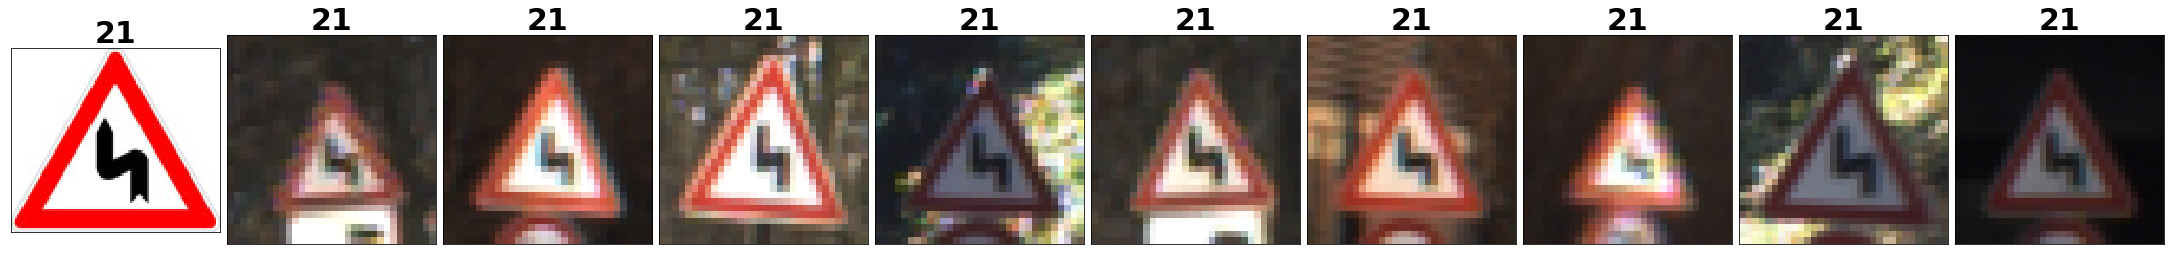

In [4]:
show_one_class_images(X_train,y_train,21)

####  Random show one image of all class from dataset.

Random show each class from data set:


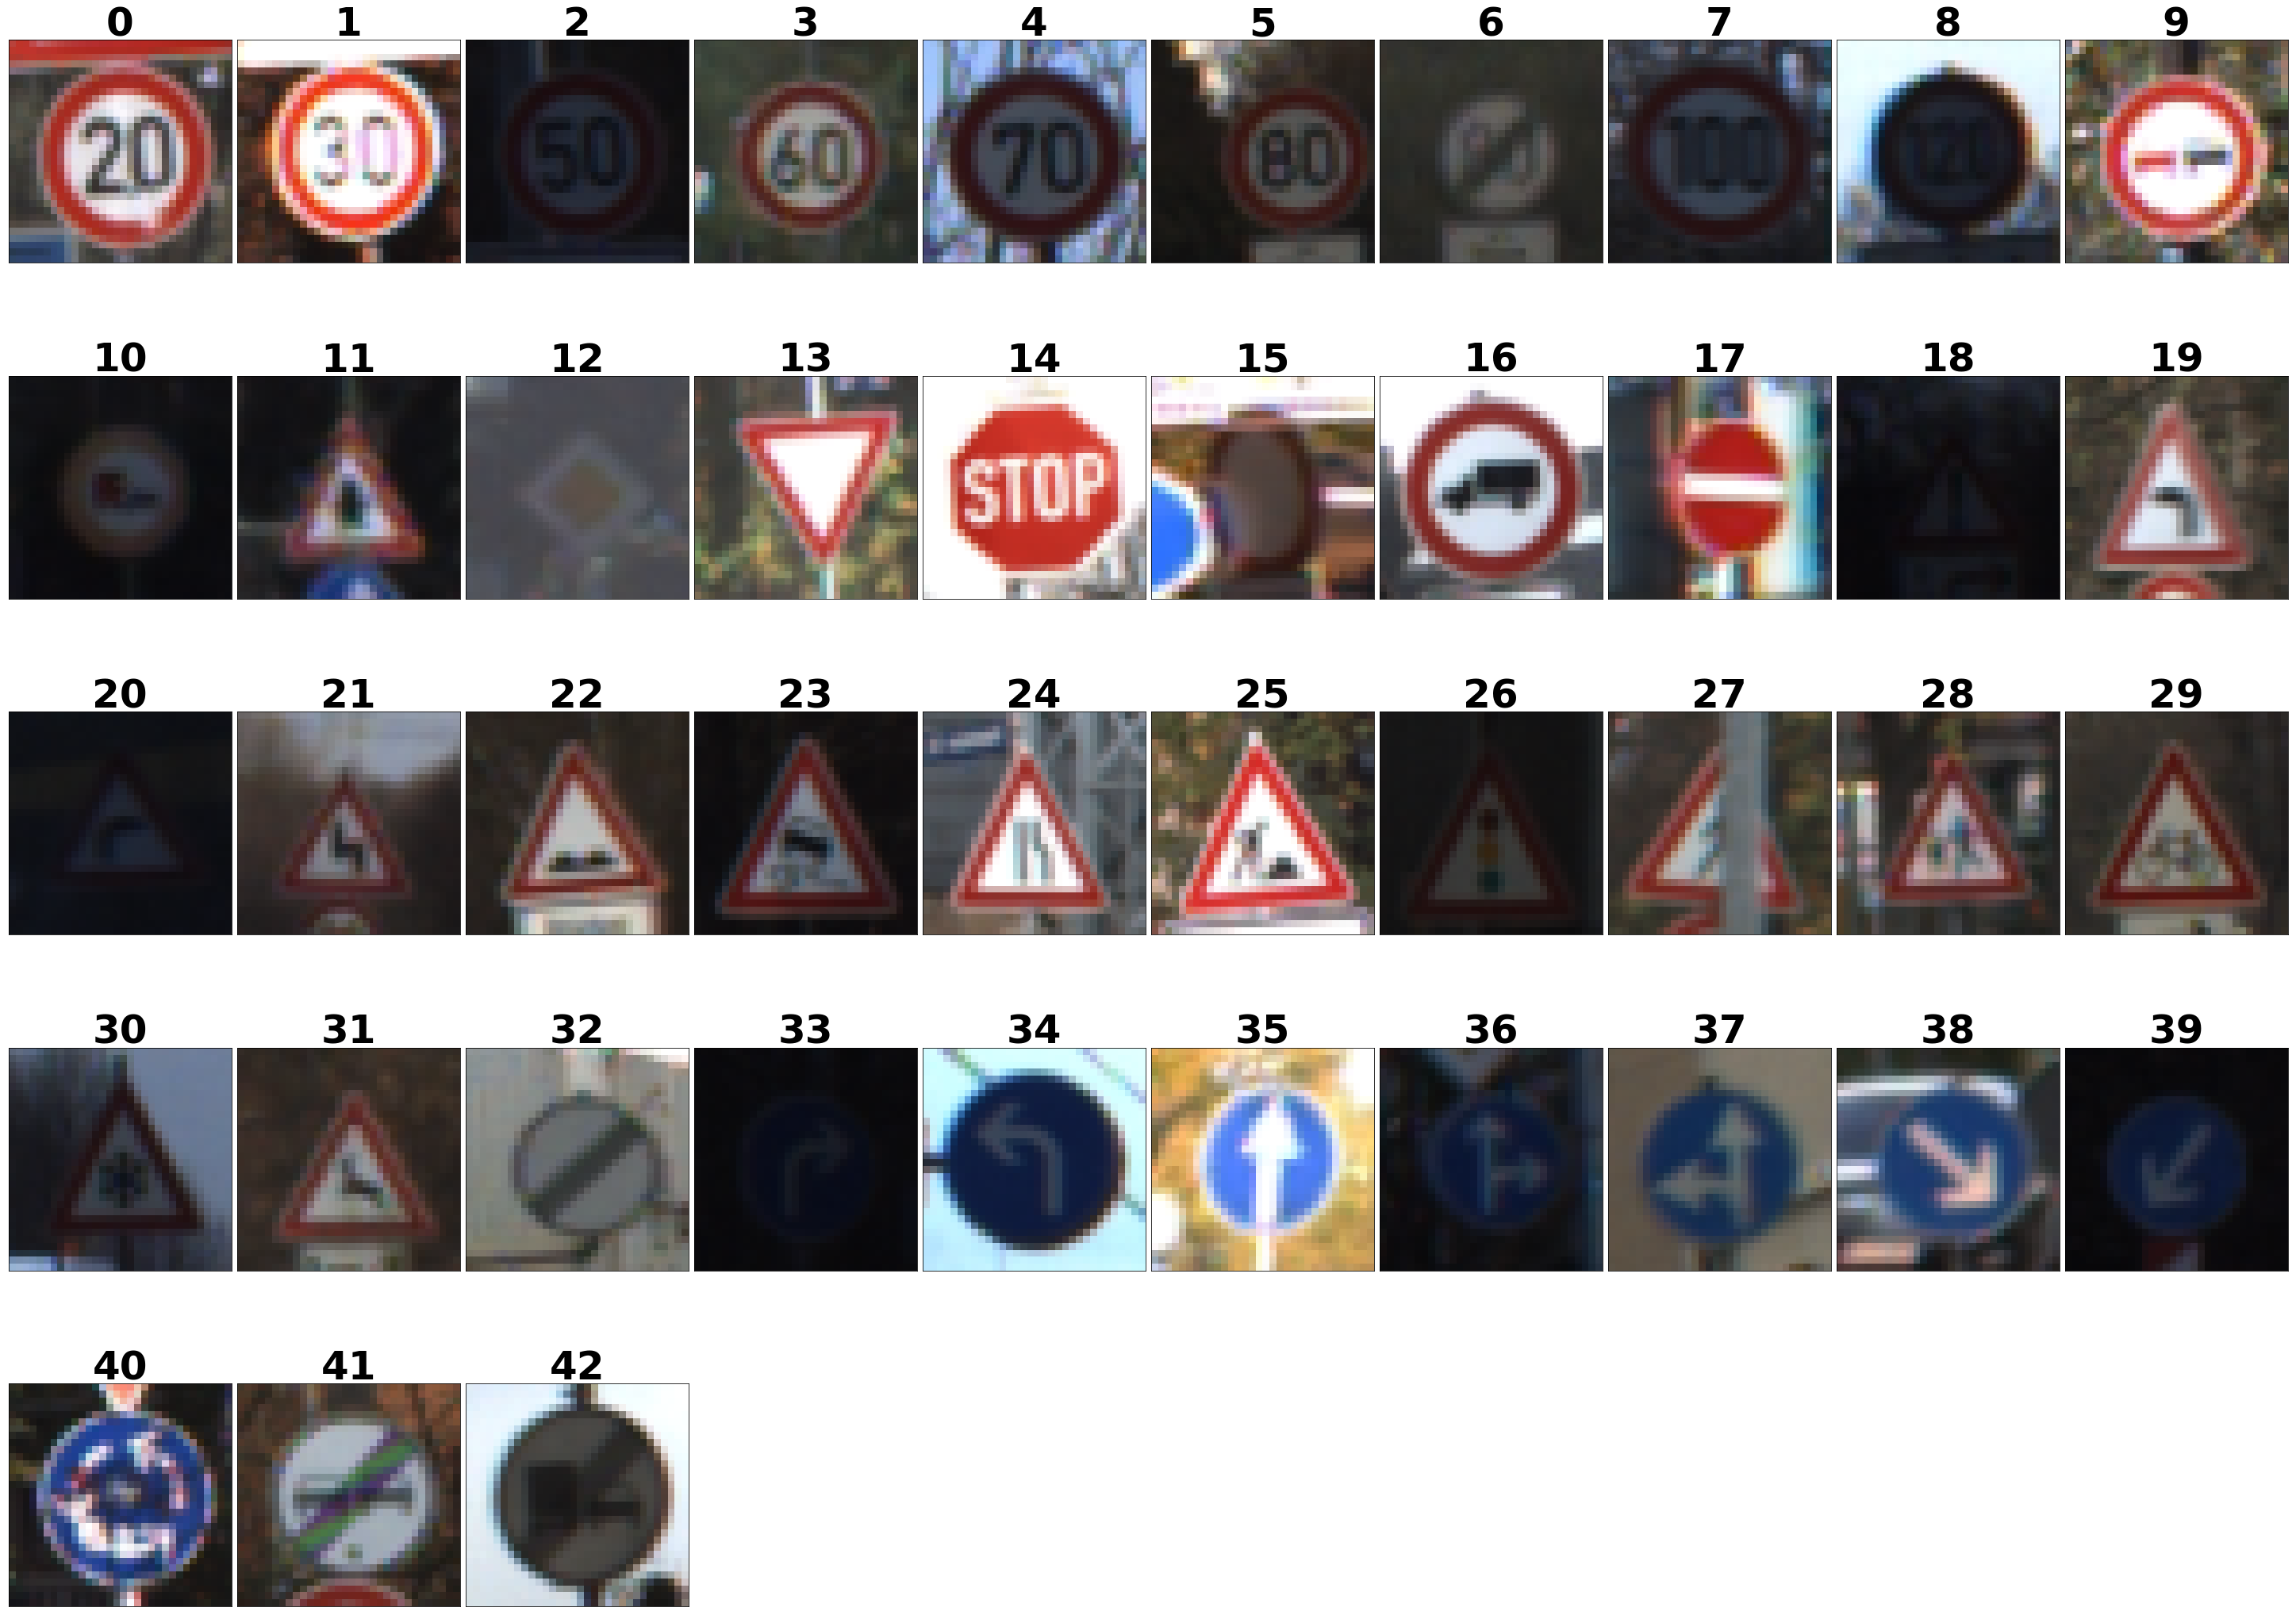

In [5]:
show_all_class_images(X_train,y_train)
# show_all_class_images(X_valid,y_valid)
# show_all_class_images(X_test,y_test)

### Show all class by class from dataset.

Show Class=[0],Name=[Speed limit (20km/h)] from data set,Show length is [10],Total length is [180]


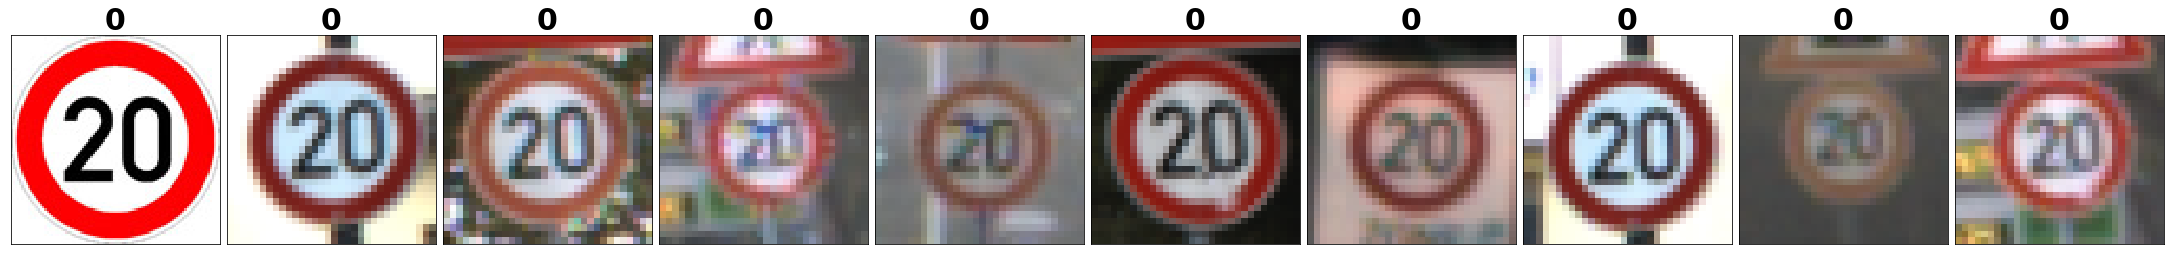

Show Class=[1],Name=[Speed limit (30km/h)] from data set,Show length is [10],Total length is [1980]


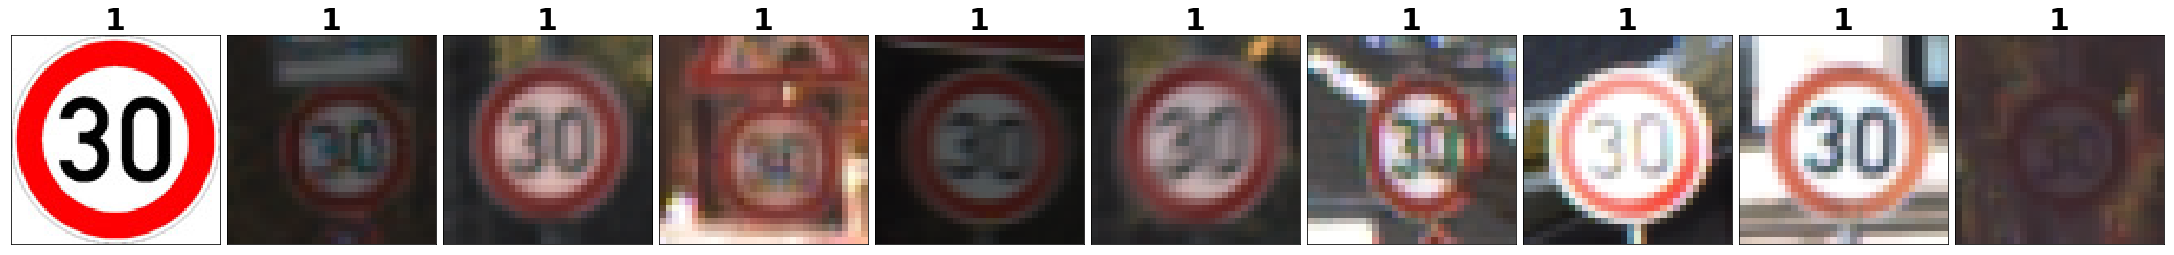

Show Class=[2],Name=[Speed limit (50km/h)] from data set,Show length is [10],Total length is [2010]


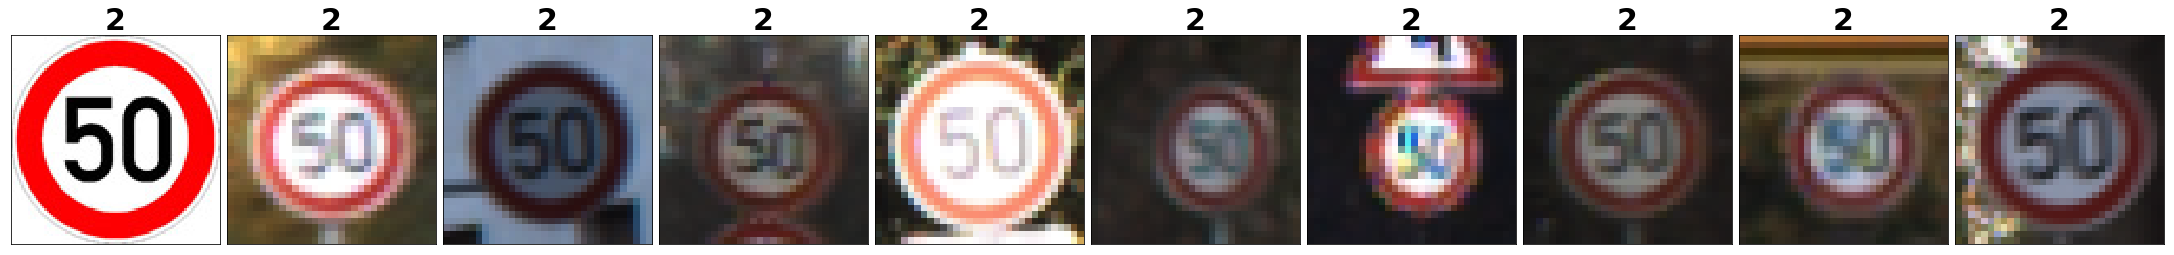

Show Class=[3],Name=[Speed limit (60km/h)] from data set,Show length is [10],Total length is [1260]


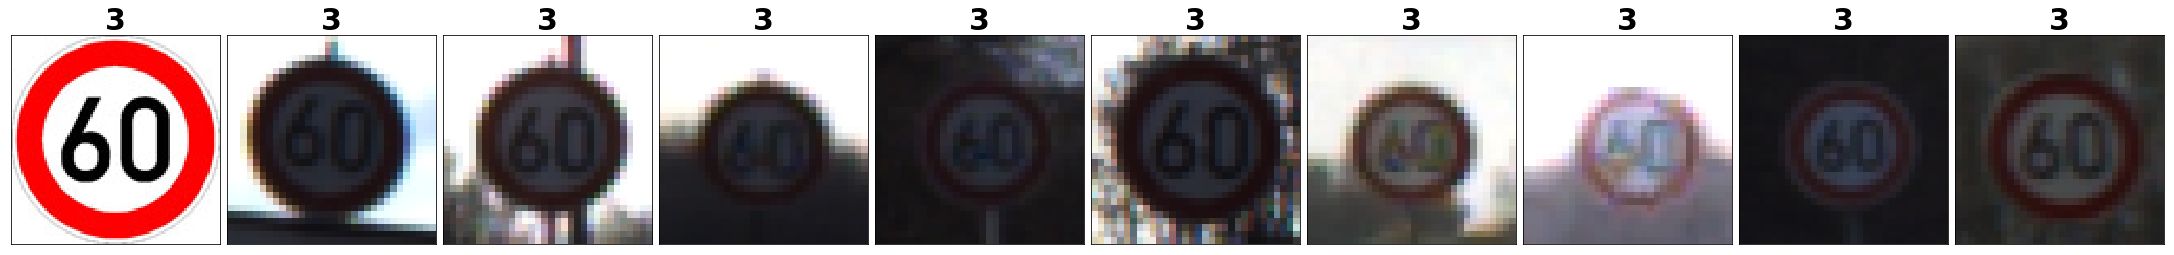

Show Class=[4],Name=[Speed limit (70km/h)] from data set,Show length is [10],Total length is [1770]


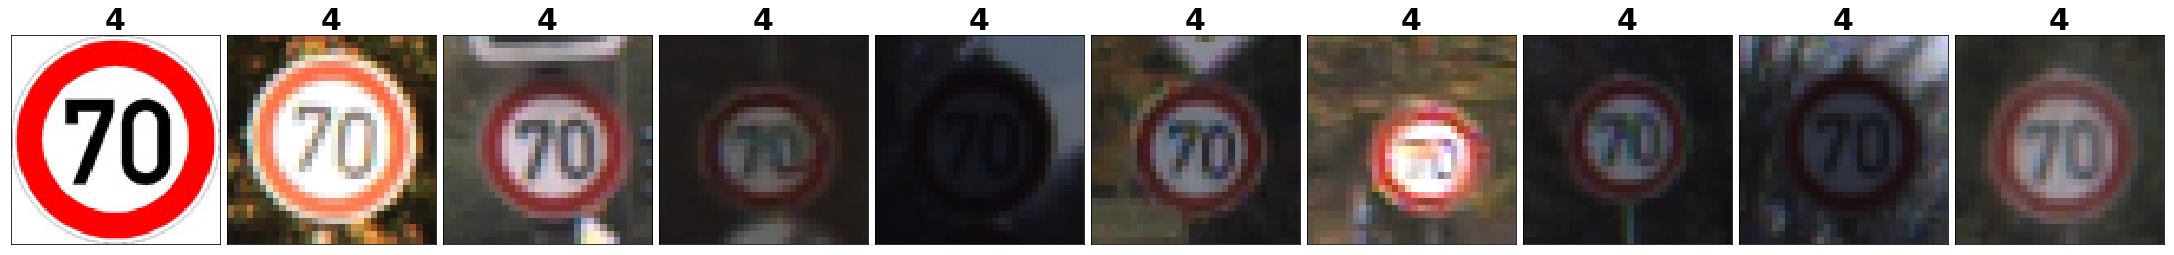

Show Class=[5],Name=[Speed limit (80km/h)] from data set,Show length is [10],Total length is [1650]


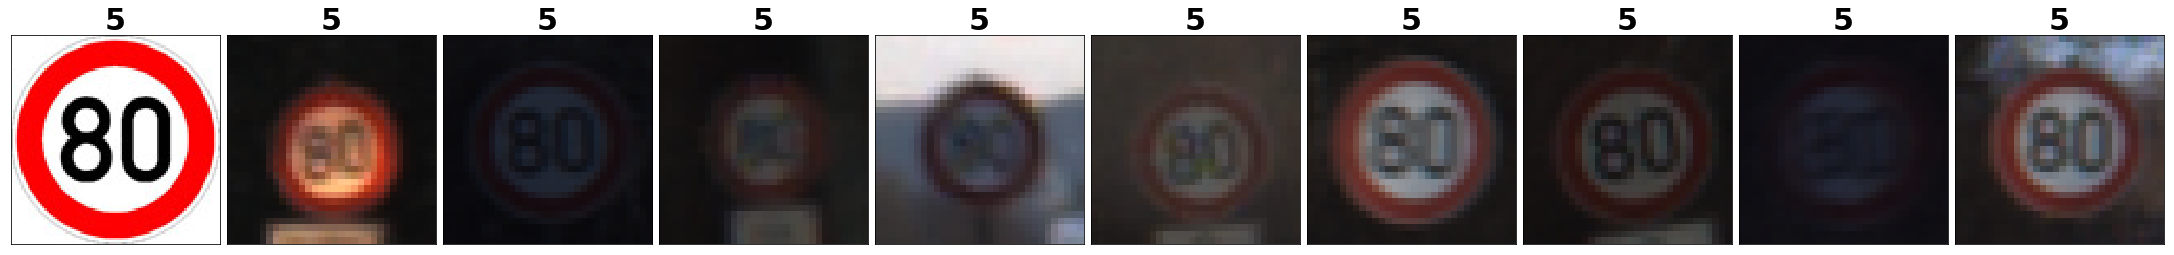

Show Class=[6],Name=[End of speed limit (80km/h)] from data set,Show length is [10],Total length is [360]


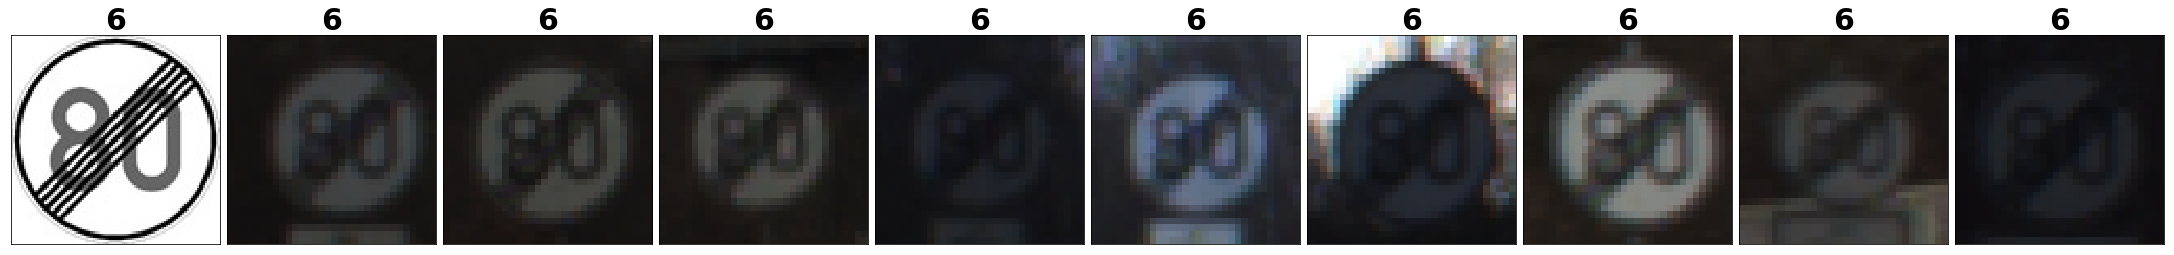

Show Class=[7],Name=[Speed limit (100km/h)] from data set,Show length is [10],Total length is [1290]


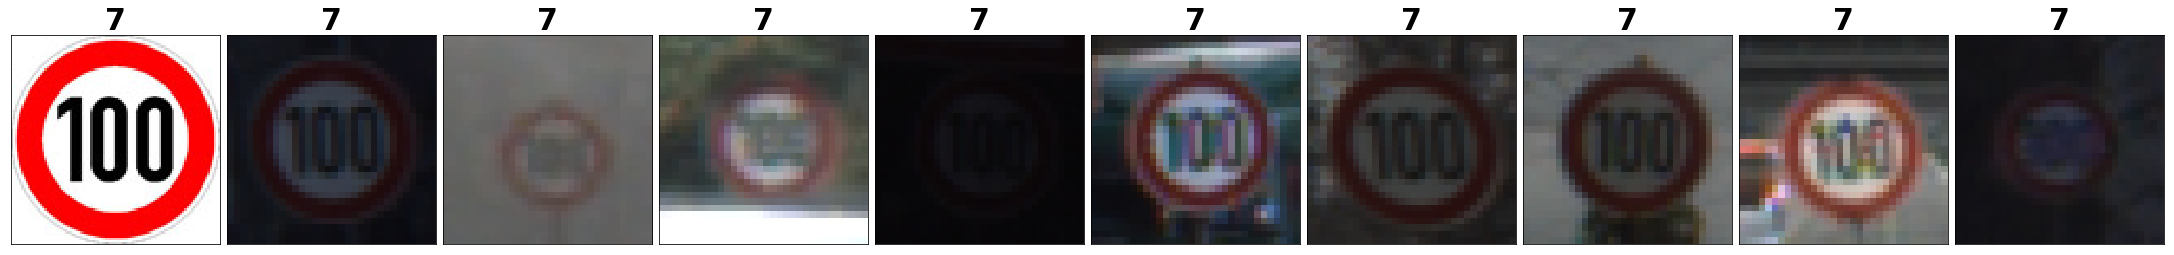

Show Class=[8],Name=[Speed limit (120km/h)] from data set,Show length is [10],Total length is [1260]


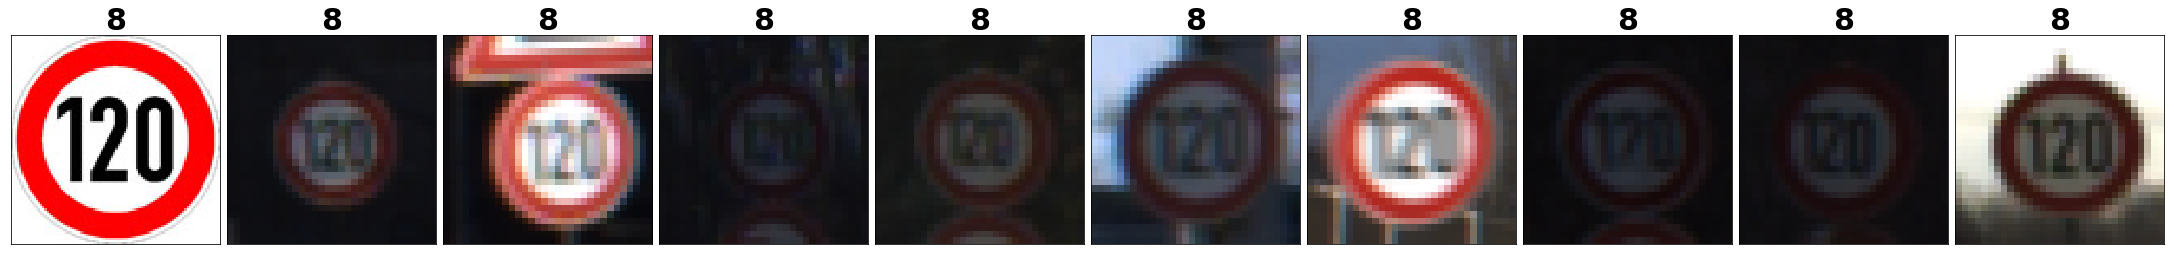

Show Class=[9],Name=[No passing] from data set,Show length is [10],Total length is [1320]


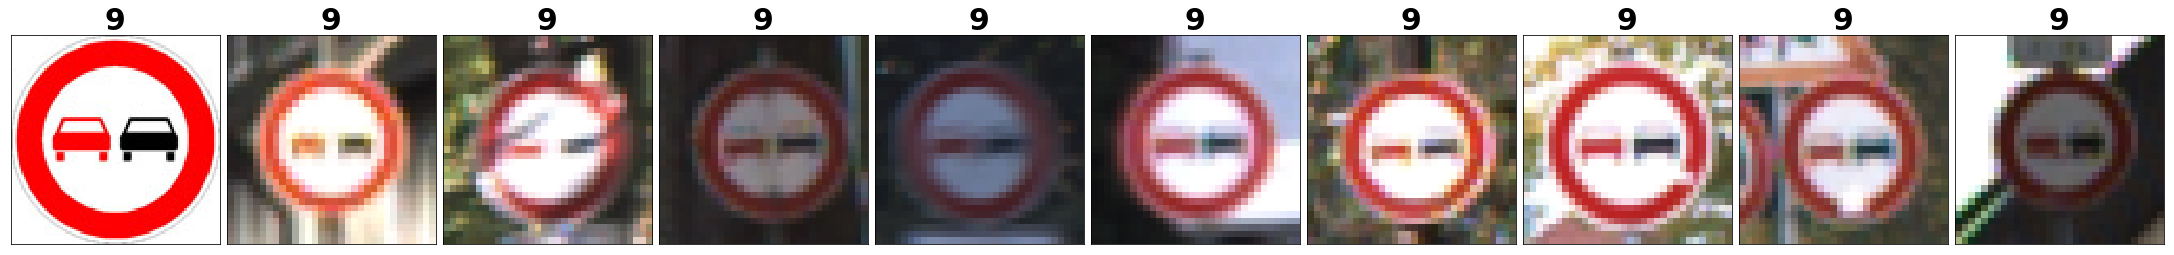

Show Class=[10],Name=[No passing for vehicles over 3.5 metric tons] from data set,Show length is [10],Total length is [1800]


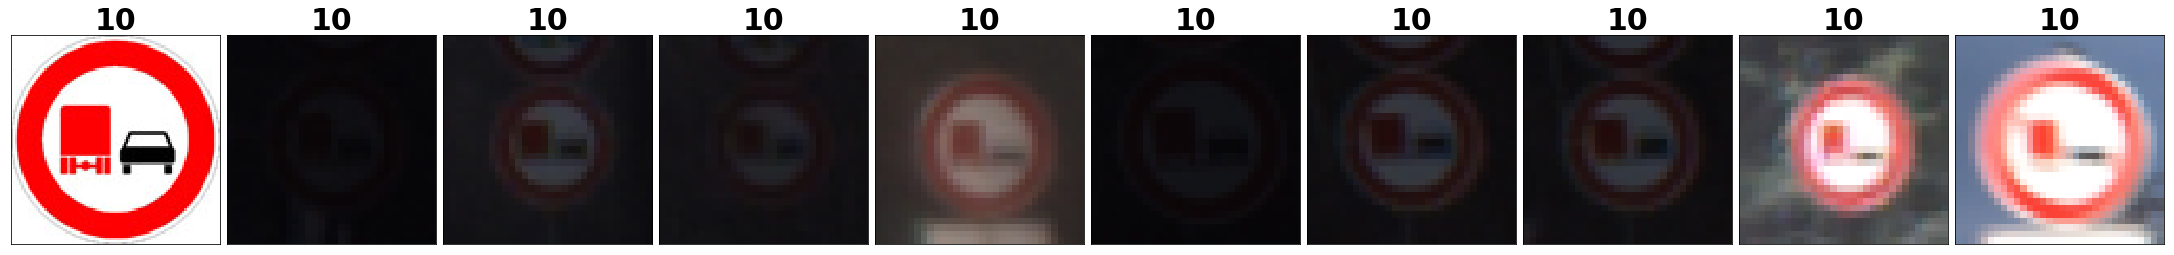

Show Class=[11],Name=[Right-of-way at the next intersection] from data set,Show length is [10],Total length is [1170]


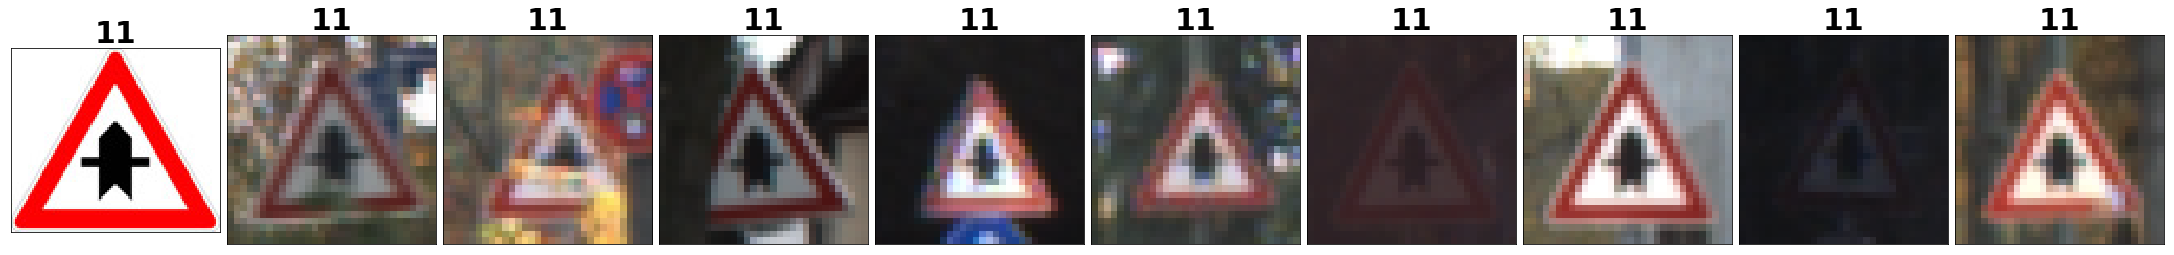

Show Class=[12],Name=[Priority road] from data set,Show length is [10],Total length is [1890]


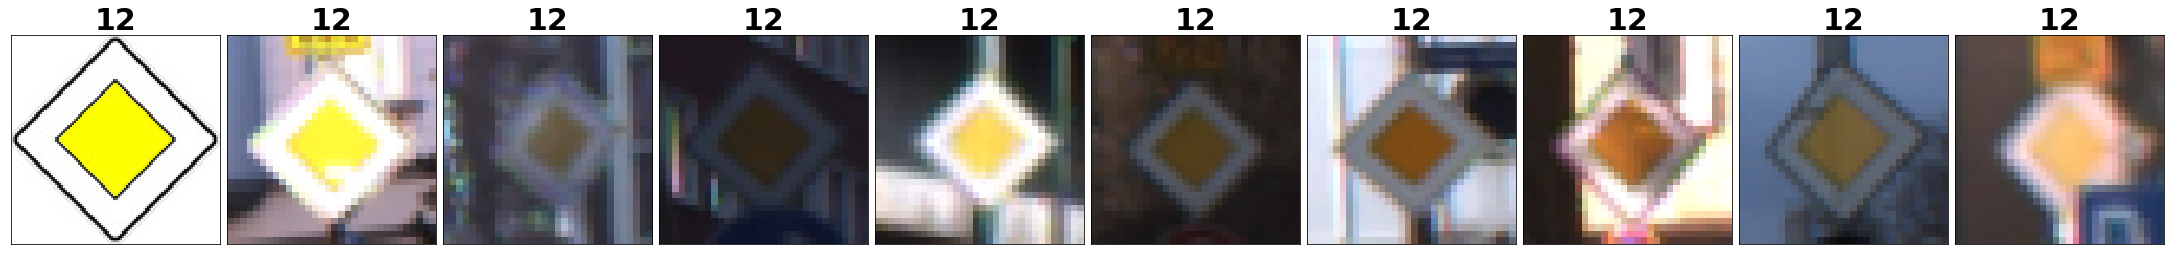

Show Class=[13],Name=[Yield] from data set,Show length is [10],Total length is [1920]


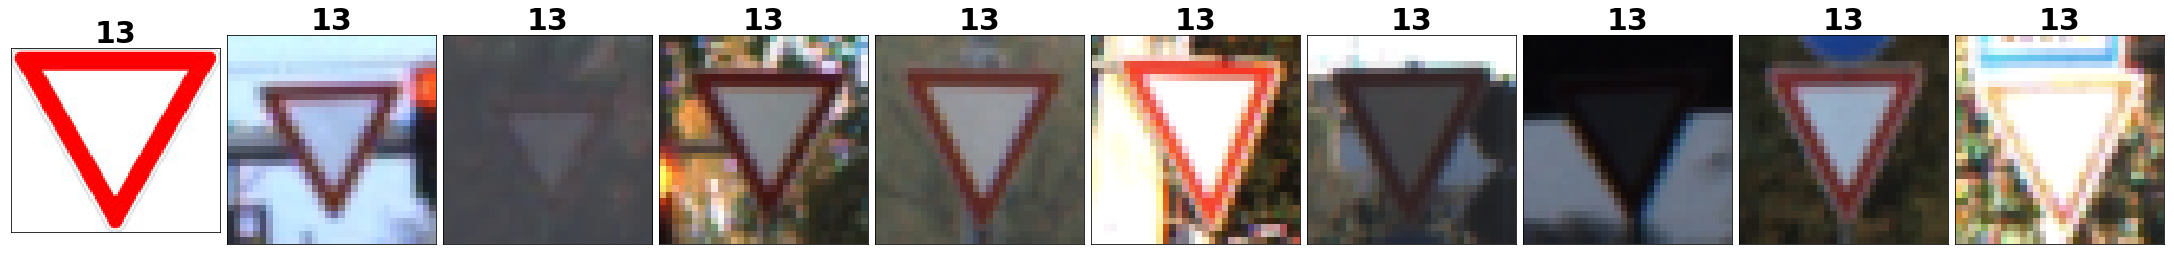

Show Class=[14],Name=[Stop] from data set,Show length is [10],Total length is [690]


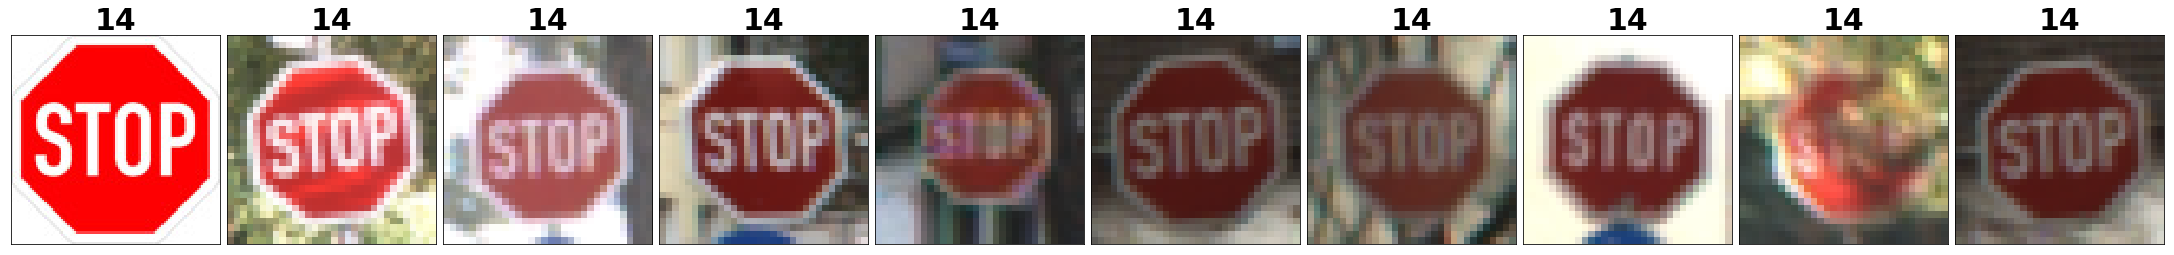

Show Class=[15],Name=[No vehicles] from data set,Show length is [10],Total length is [540]


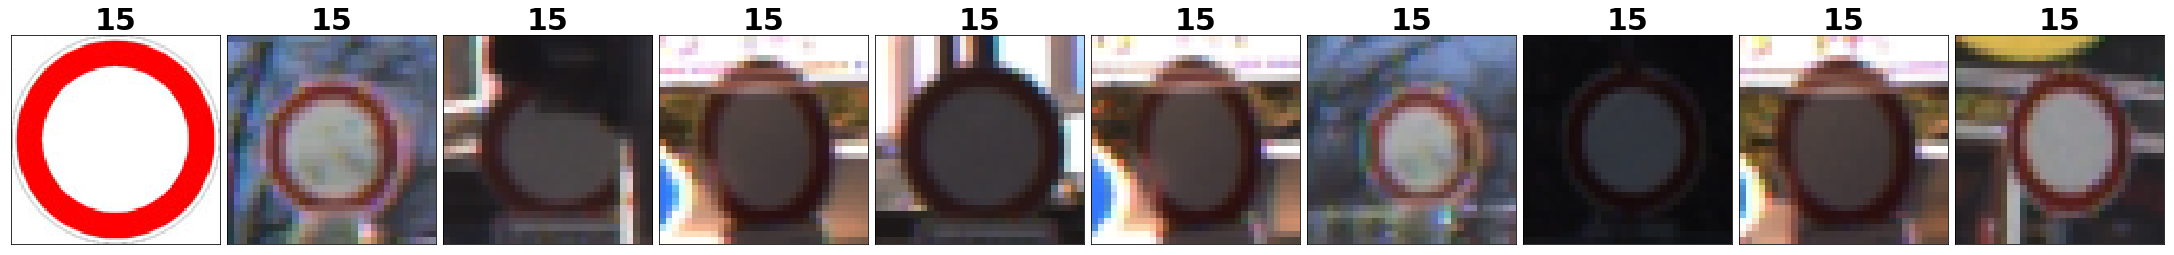

Show Class=[16],Name=[Vehicles over 3.5 metric tons prohibited] from data set,Show length is [10],Total length is [360]


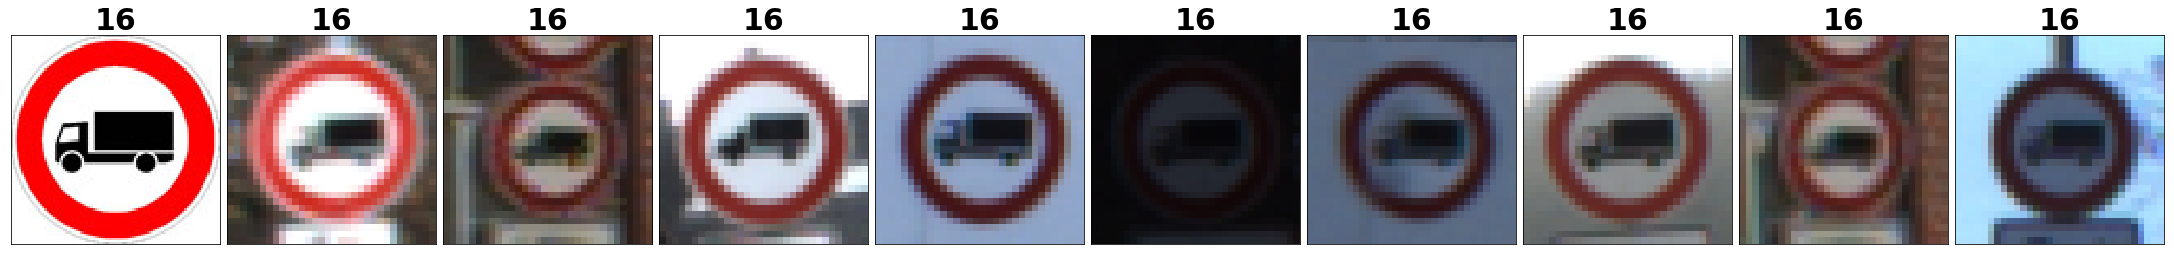

Show Class=[17],Name=[No entry] from data set,Show length is [10],Total length is [990]


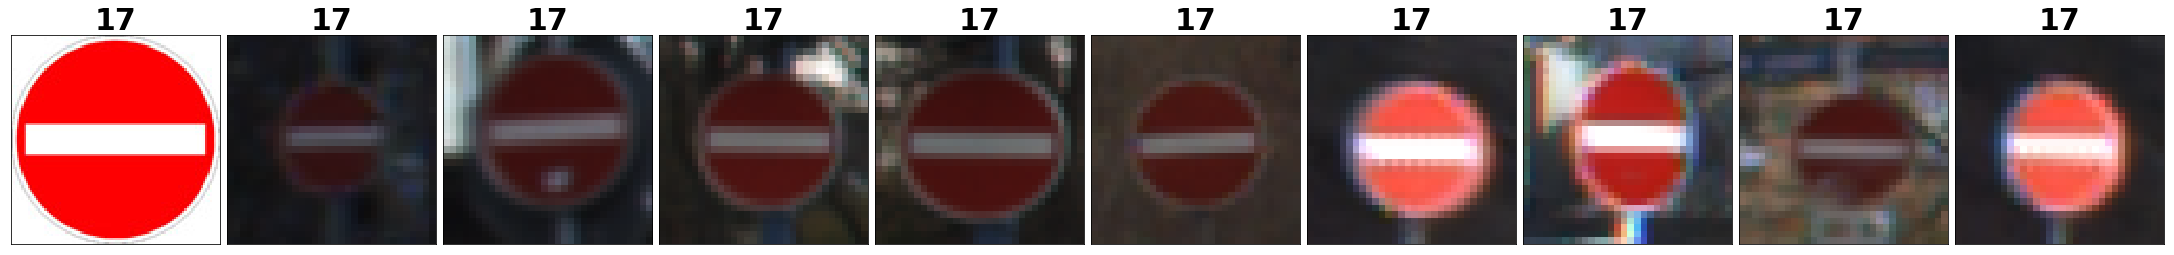

Show Class=[18],Name=[General caution] from data set,Show length is [10],Total length is [1080]


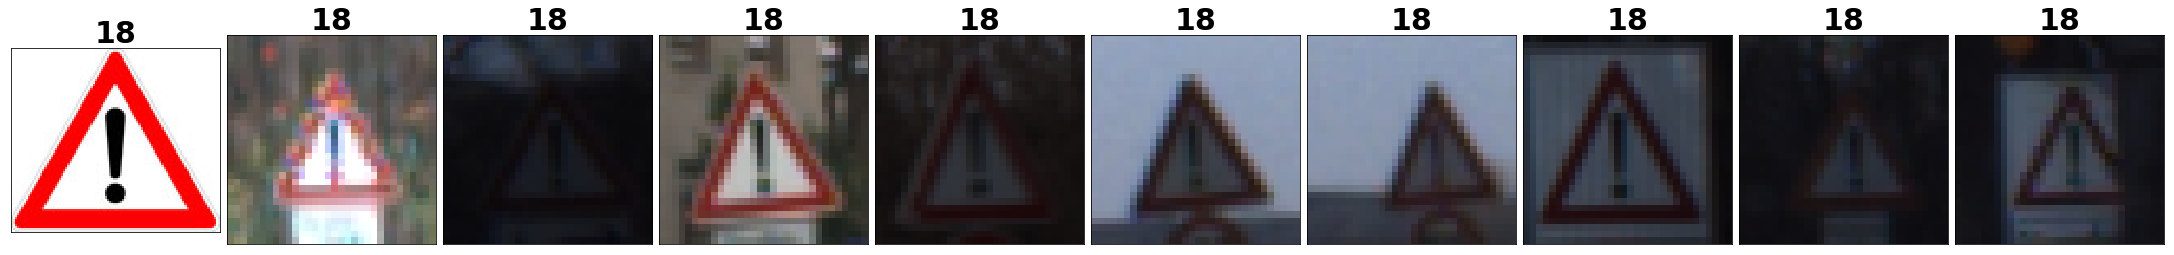

Show Class=[19],Name=[Dangerous curve to the left] from data set,Show length is [10],Total length is [180]


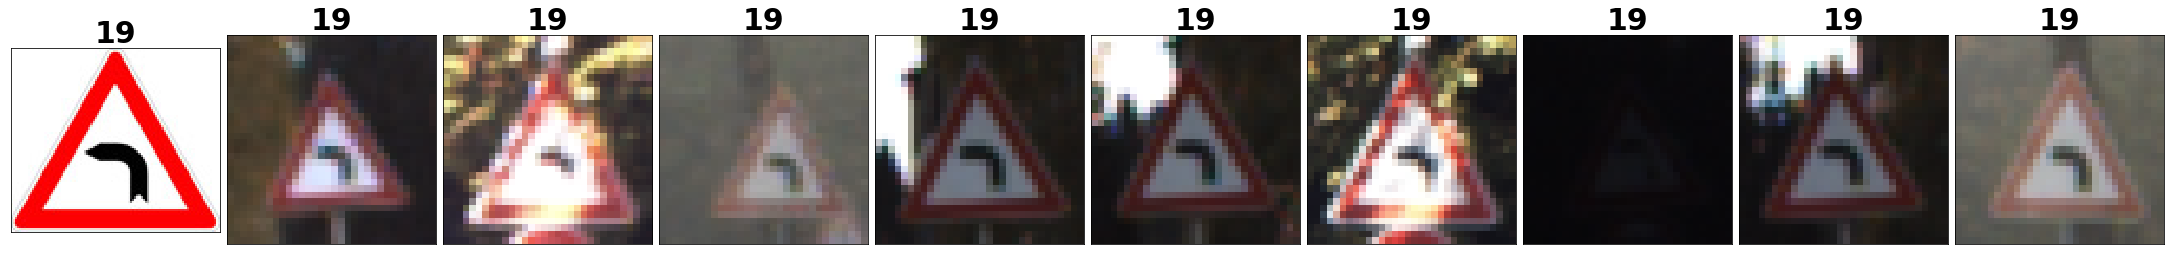

Show Class=[20],Name=[Dangerous curve to the right] from data set,Show length is [10],Total length is [300]


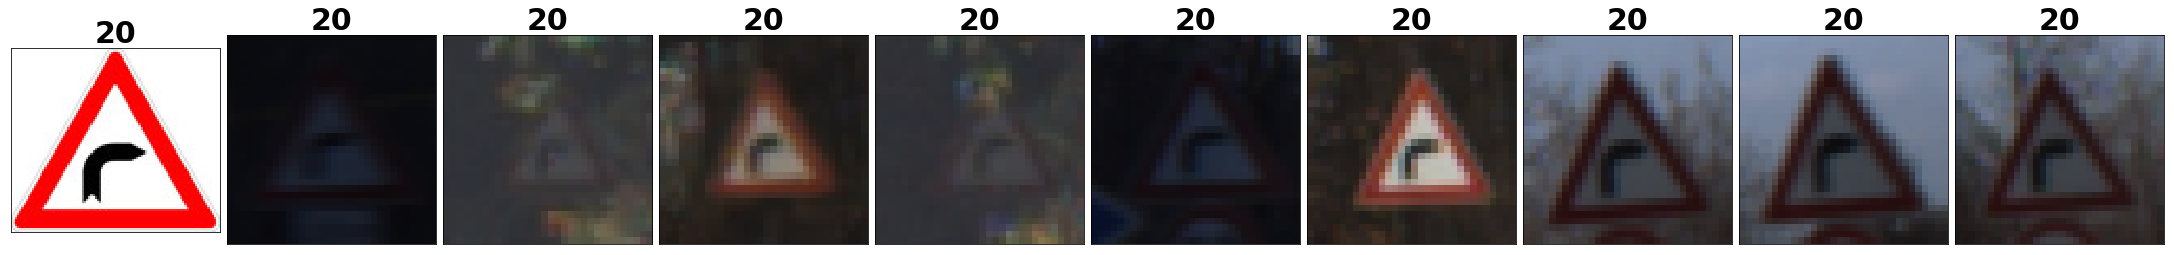

Show Class=[21],Name=[Double curve] from data set,Show length is [10],Total length is [270]


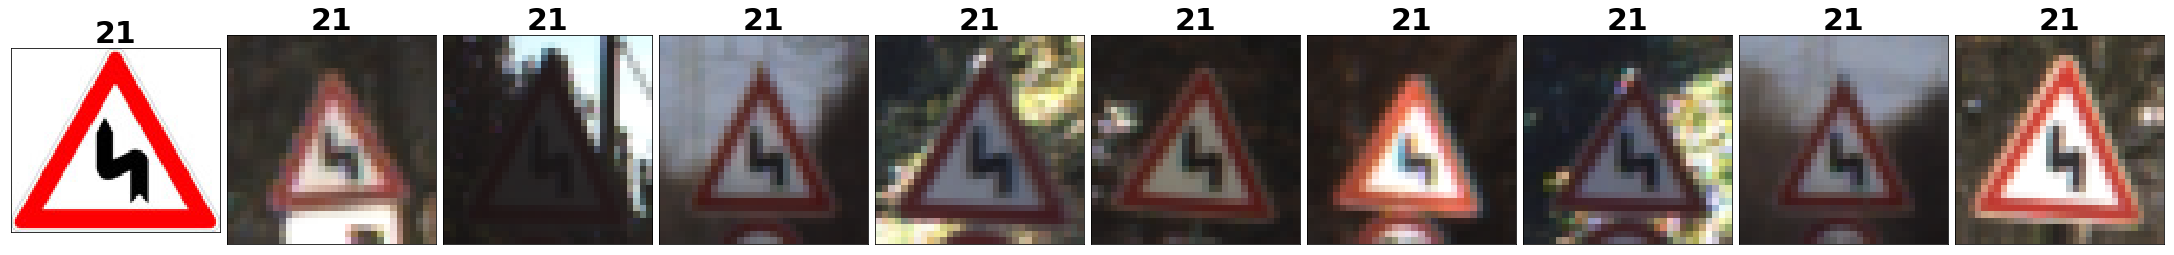

Show Class=[22],Name=[Bumpy road] from data set,Show length is [10],Total length is [330]


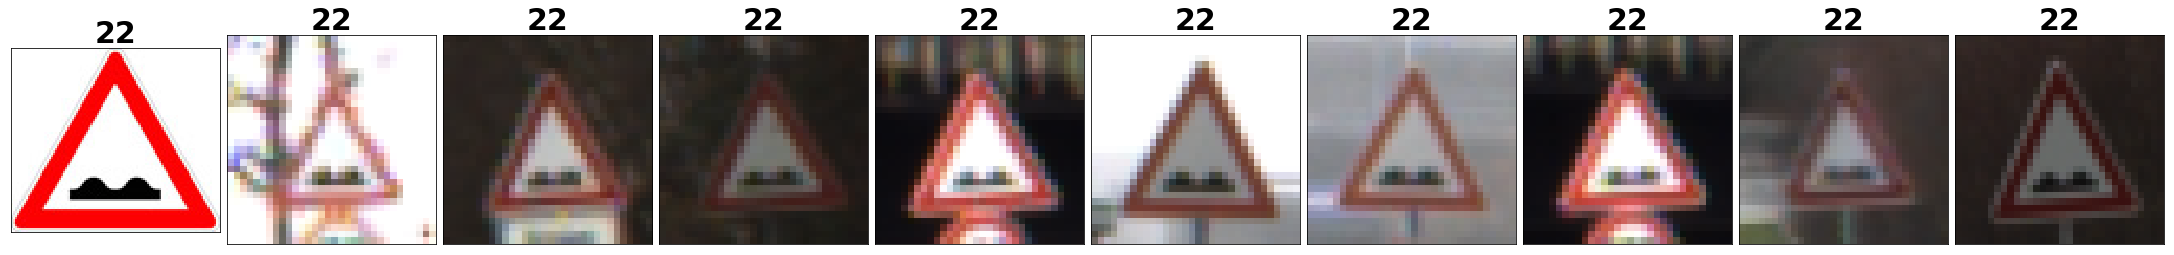

Show Class=[23],Name=[Slippery road] from data set,Show length is [10],Total length is [450]


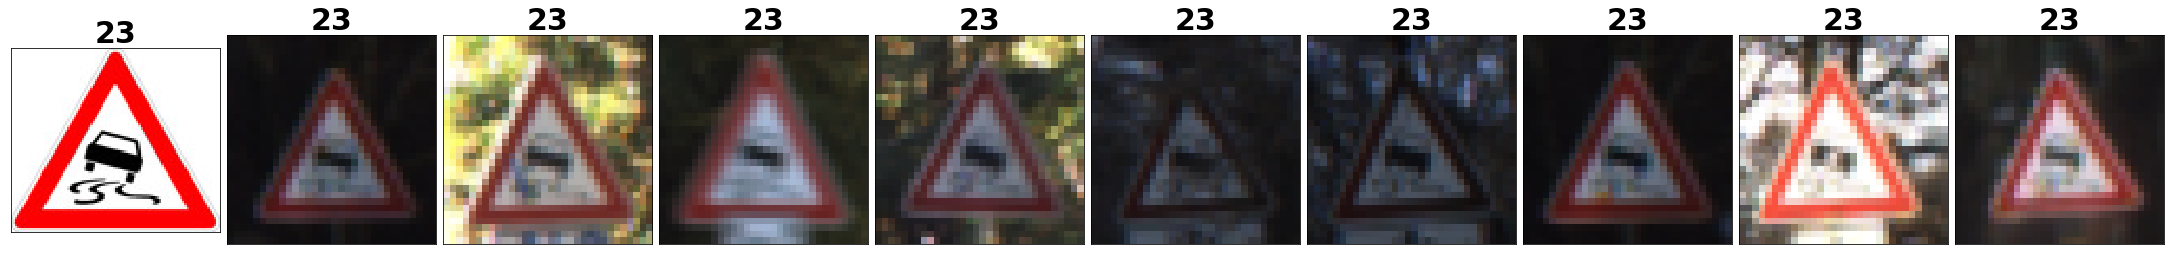

Show Class=[24],Name=[Road narrows on the right] from data set,Show length is [10],Total length is [240]


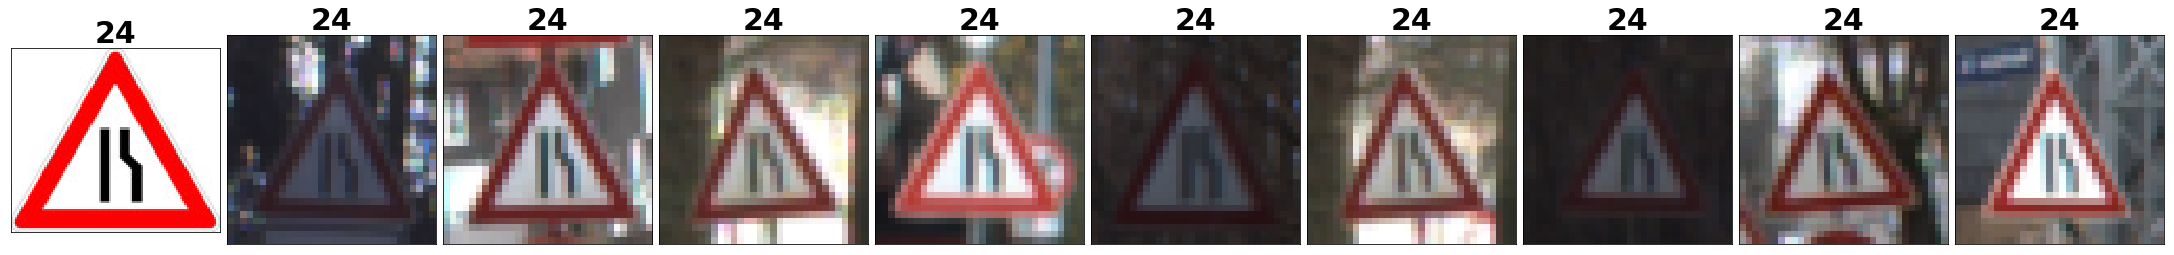

Show Class=[25],Name=[Road work] from data set,Show length is [10],Total length is [1350]


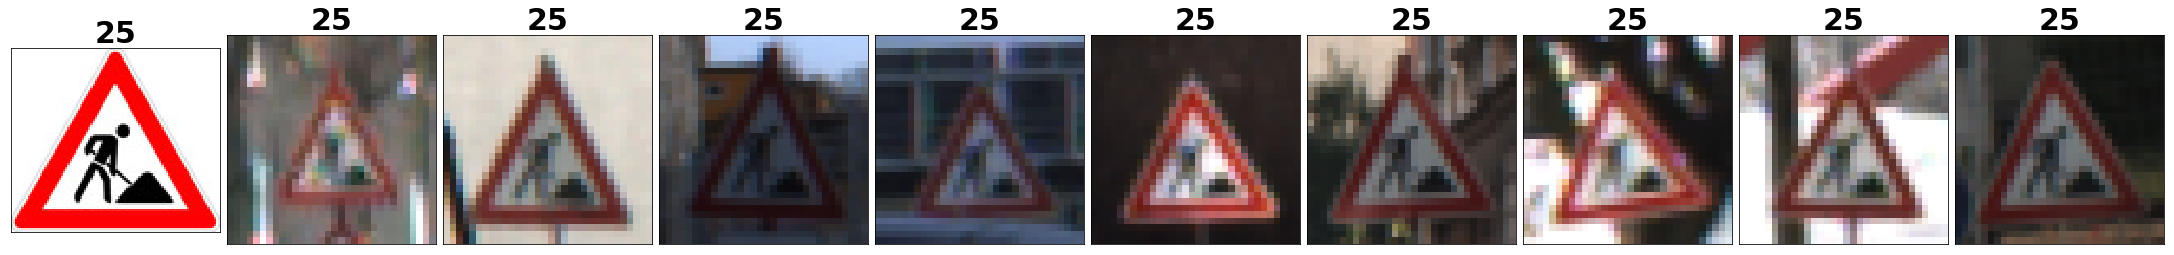

Show Class=[26],Name=[Traffic signals] from data set,Show length is [10],Total length is [540]


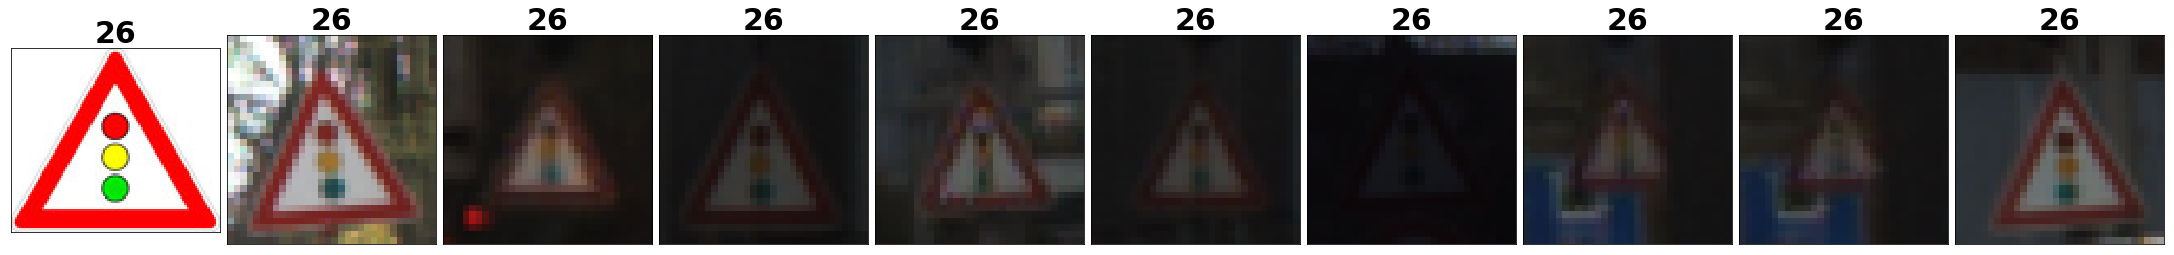

Show Class=[27],Name=[Pedestrians] from data set,Show length is [10],Total length is [210]


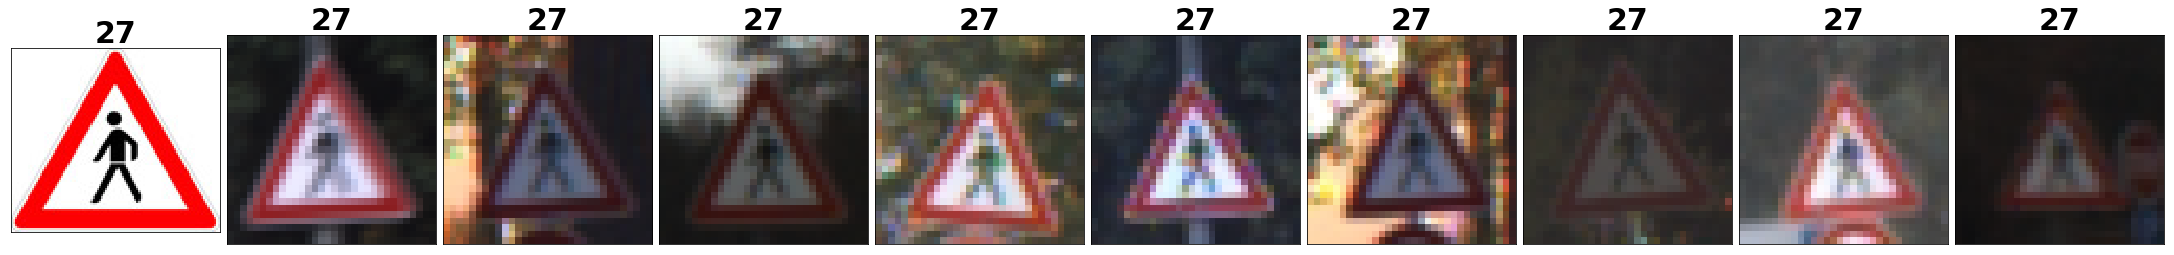

Show Class=[28],Name=[Children crossing] from data set,Show length is [10],Total length is [480]


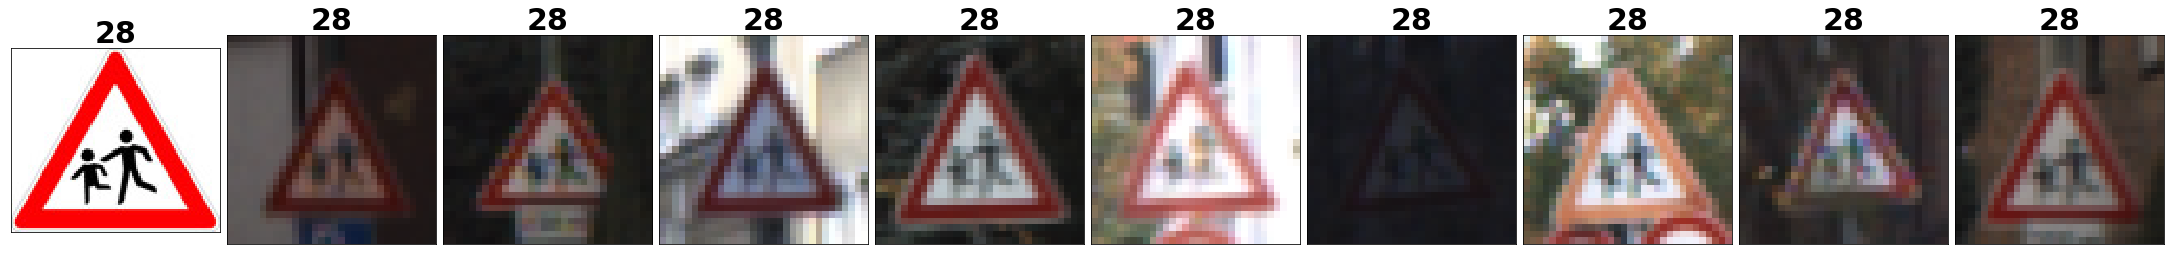

Show Class=[29],Name=[Bicycles crossing] from data set,Show length is [10],Total length is [240]


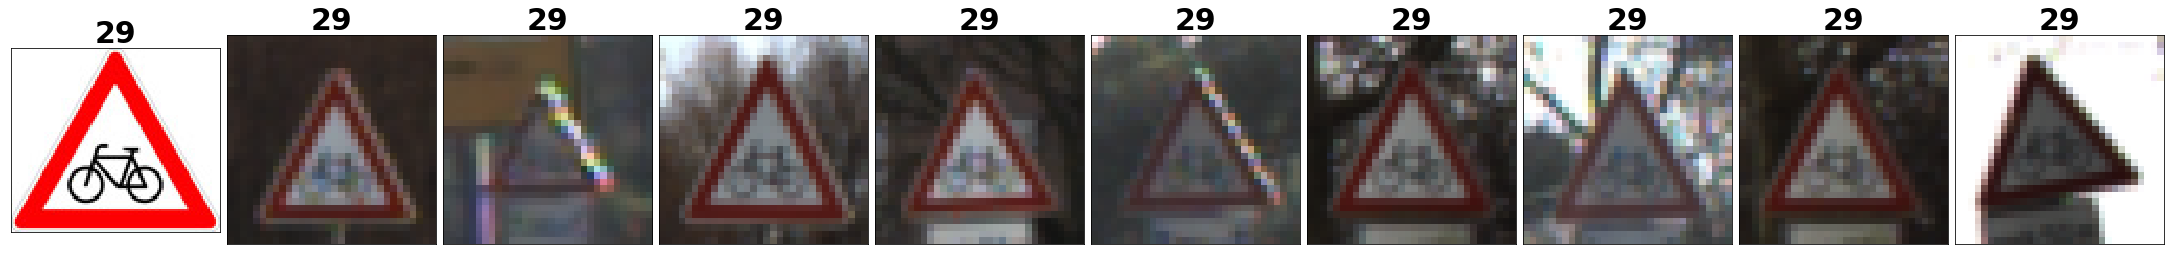

Show Class=[30],Name=[Beware of ice/snow] from data set,Show length is [10],Total length is [390]


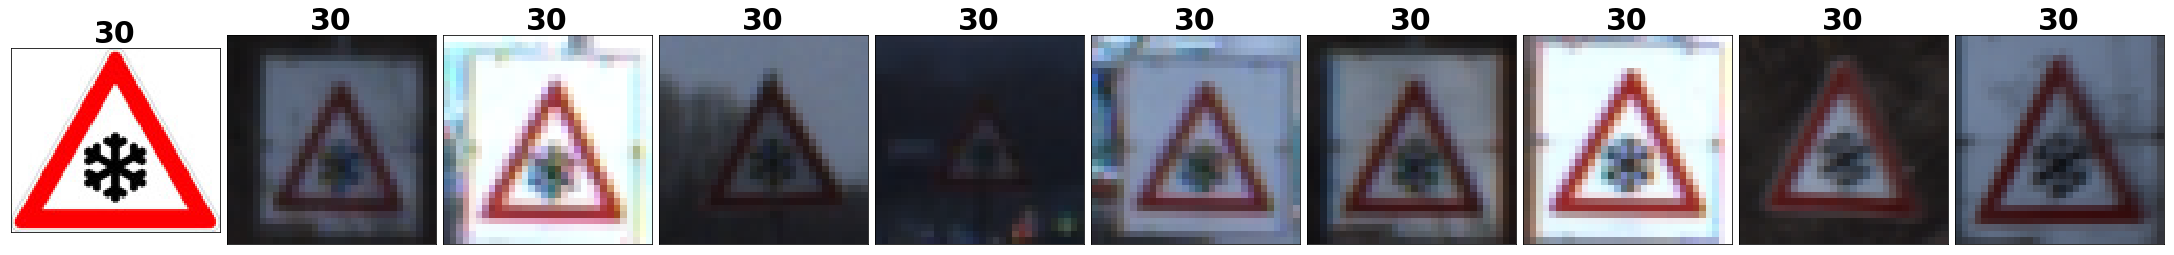

Show Class=[31],Name=[Wild animals crossing] from data set,Show length is [10],Total length is [690]


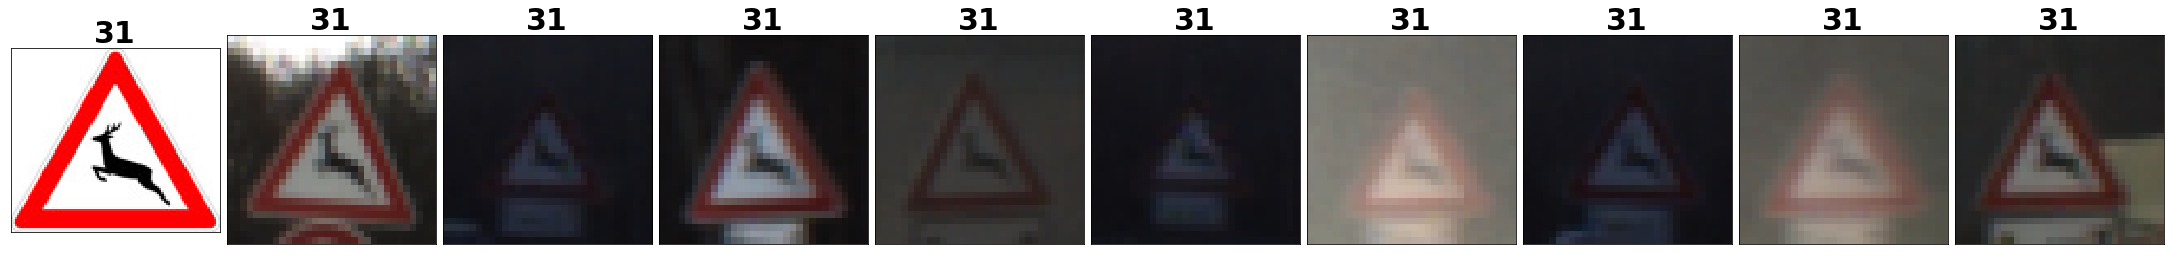

Show Class=[32],Name=[End of all speed and passing limits] from data set,Show length is [10],Total length is [210]


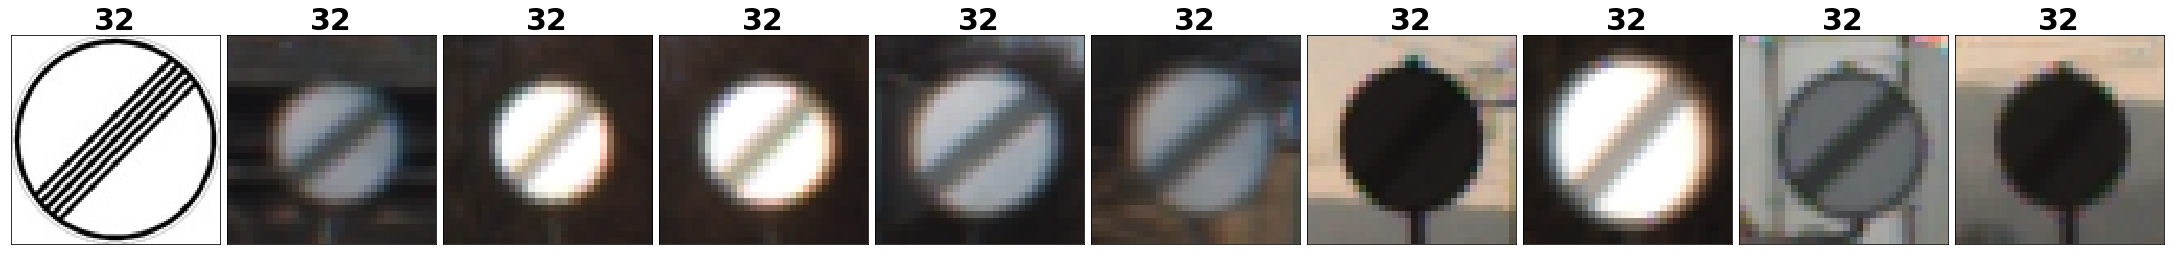

Show Class=[33],Name=[Turn right ahead] from data set,Show length is [10],Total length is [599]


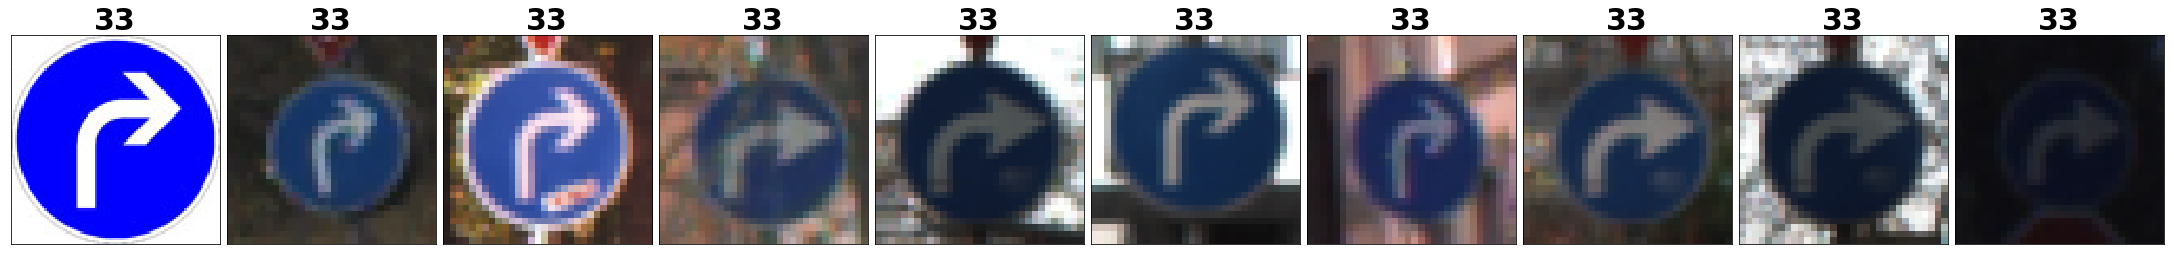

Show Class=[34],Name=[Turn left ahead] from data set,Show length is [10],Total length is [360]


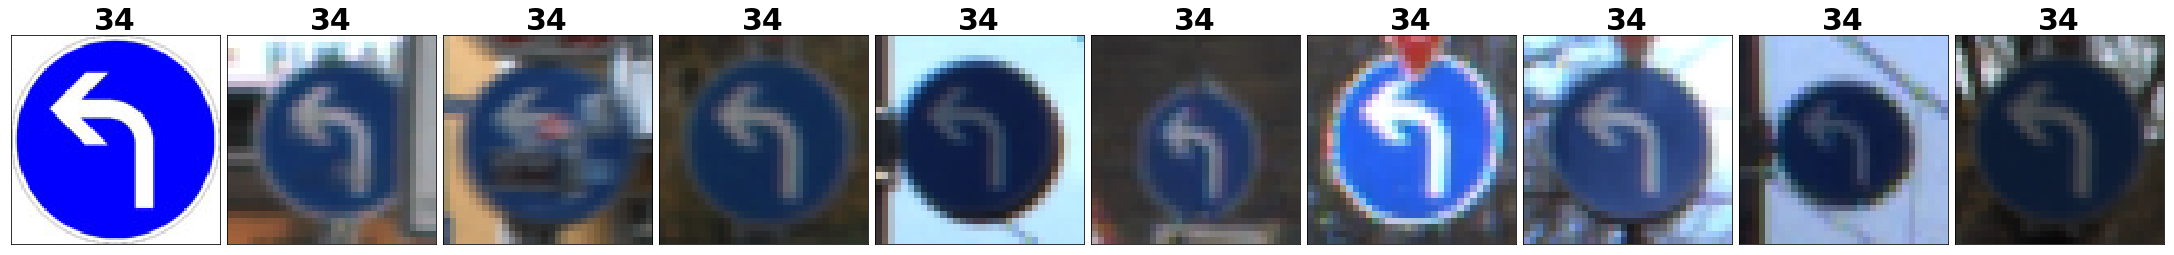

Show Class=[35],Name=[Ahead only] from data set,Show length is [10],Total length is [1080]


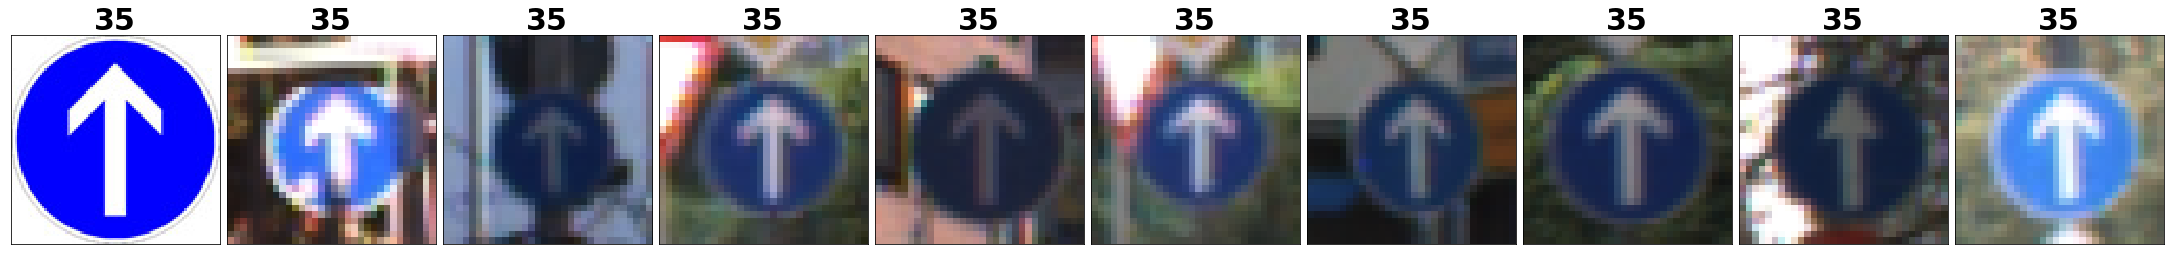

Show Class=[36],Name=[Go straight or right] from data set,Show length is [10],Total length is [330]


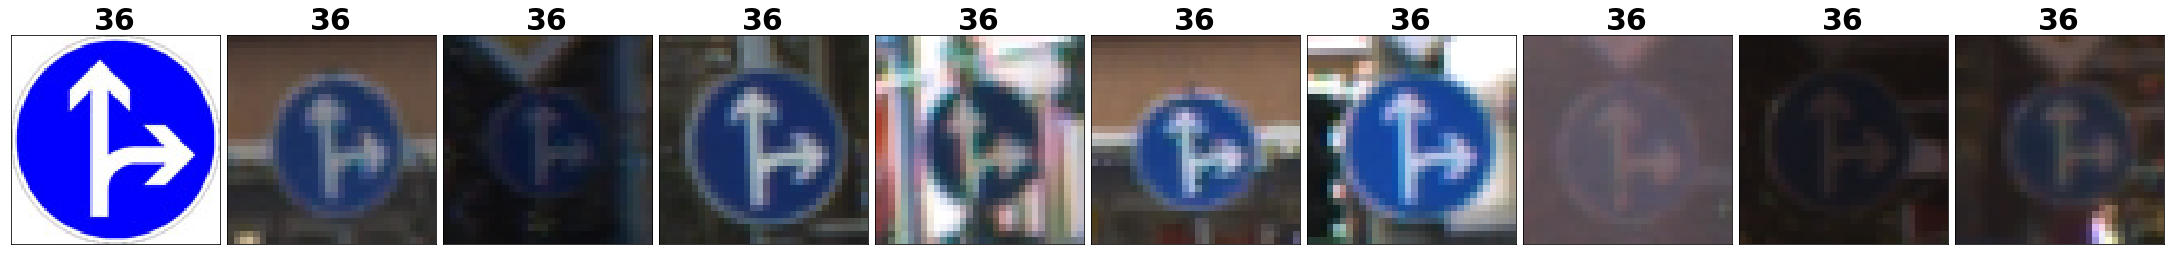

Show Class=[37],Name=[Go straight or left] from data set,Show length is [10],Total length is [180]


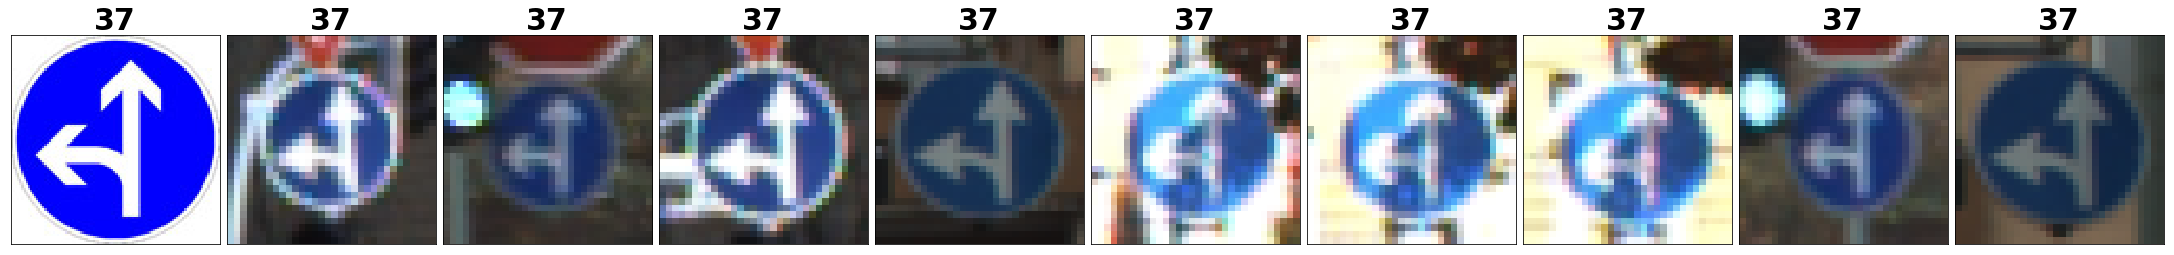

Show Class=[38],Name=[Keep right] from data set,Show length is [10],Total length is [1860]


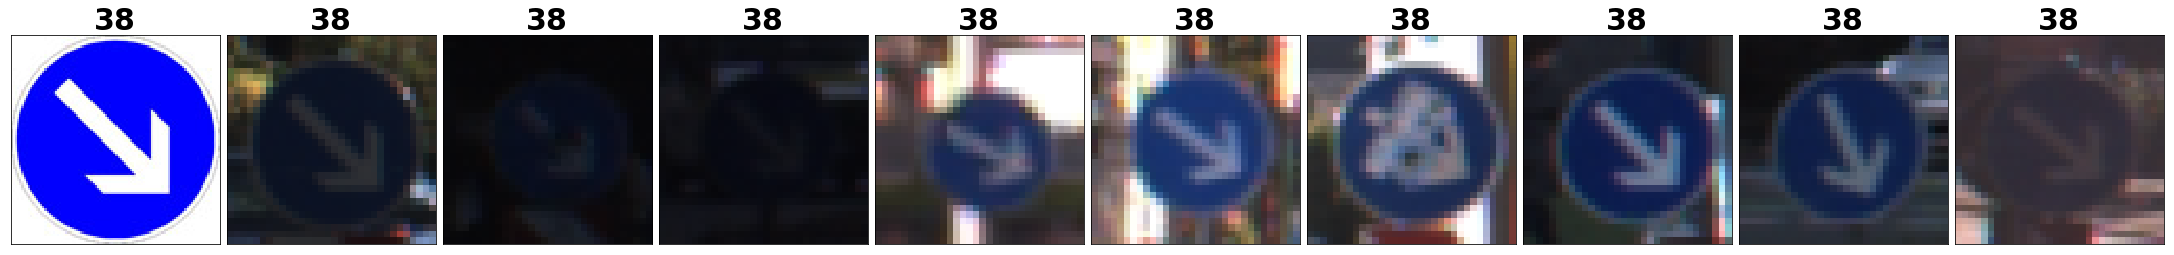

Show Class=[39],Name=[Keep left] from data set,Show length is [10],Total length is [270]


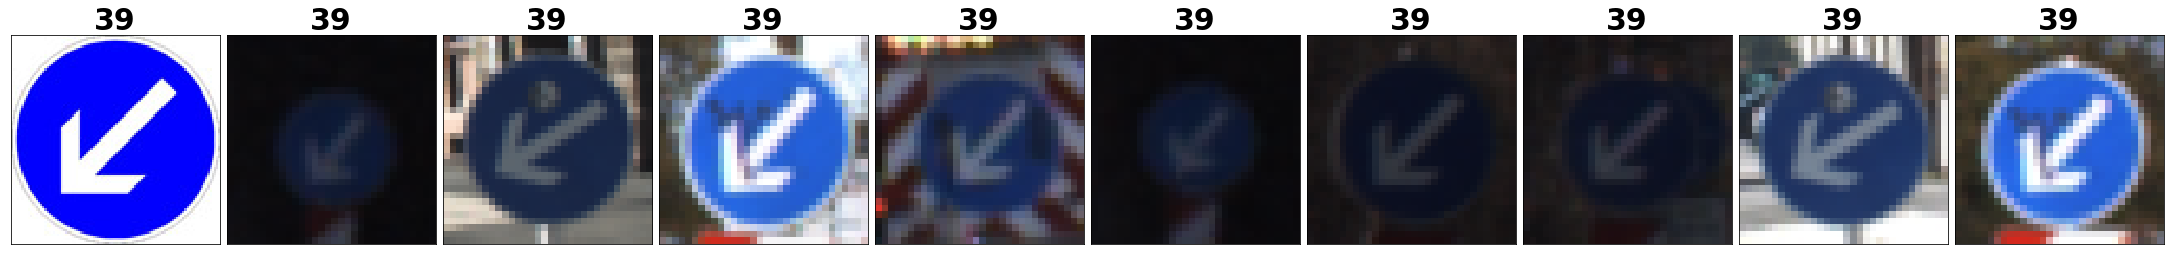

Show Class=[40],Name=[Roundabout mandatory] from data set,Show length is [10],Total length is [300]


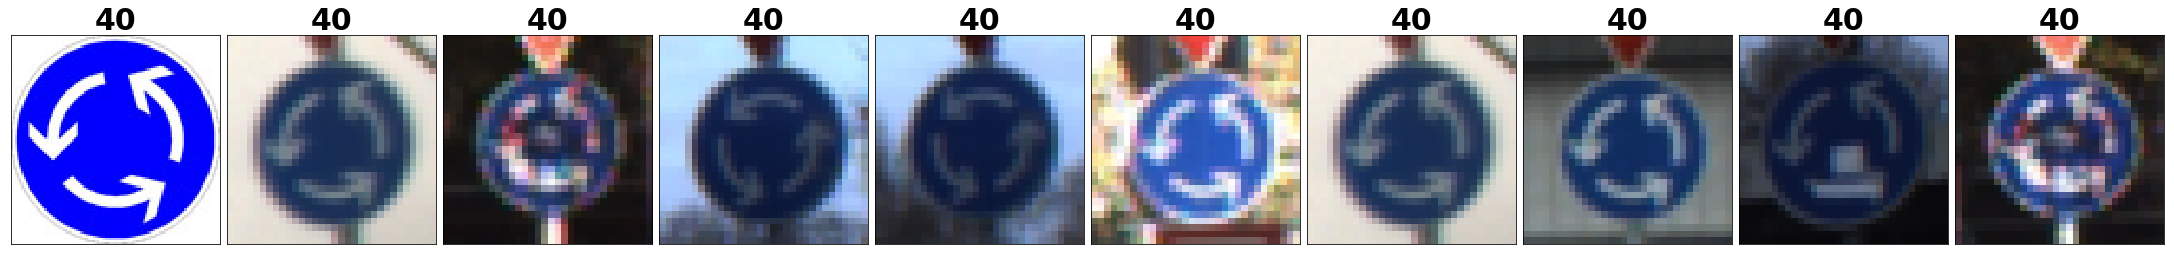

Show Class=[41],Name=[End of no passing] from data set,Show length is [10],Total length is [210]


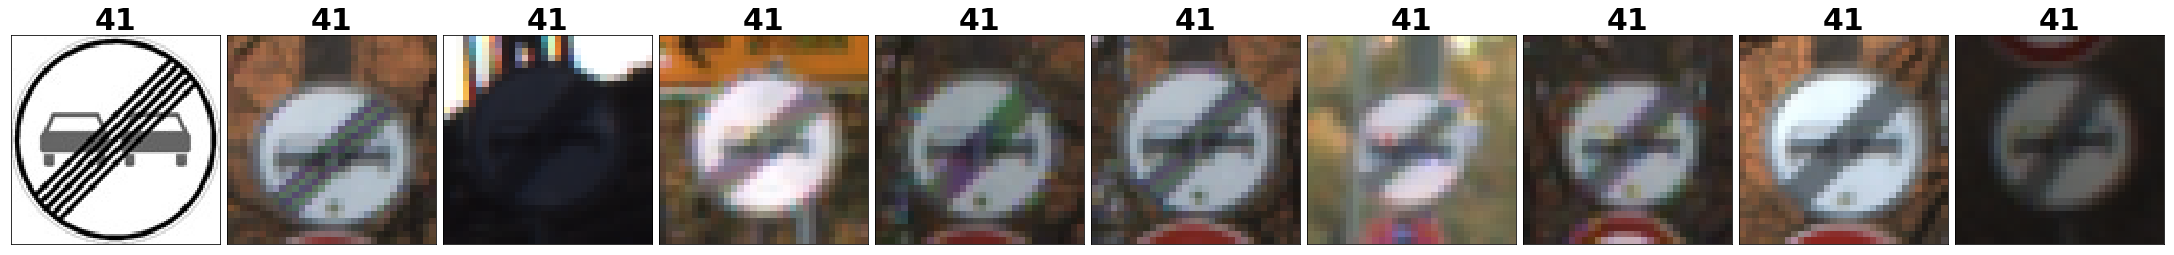

Show Class=[42],Name=[End of no passing by vehicles over 3.5 metric tons] from data set,Show length is [10],Total length is [210]


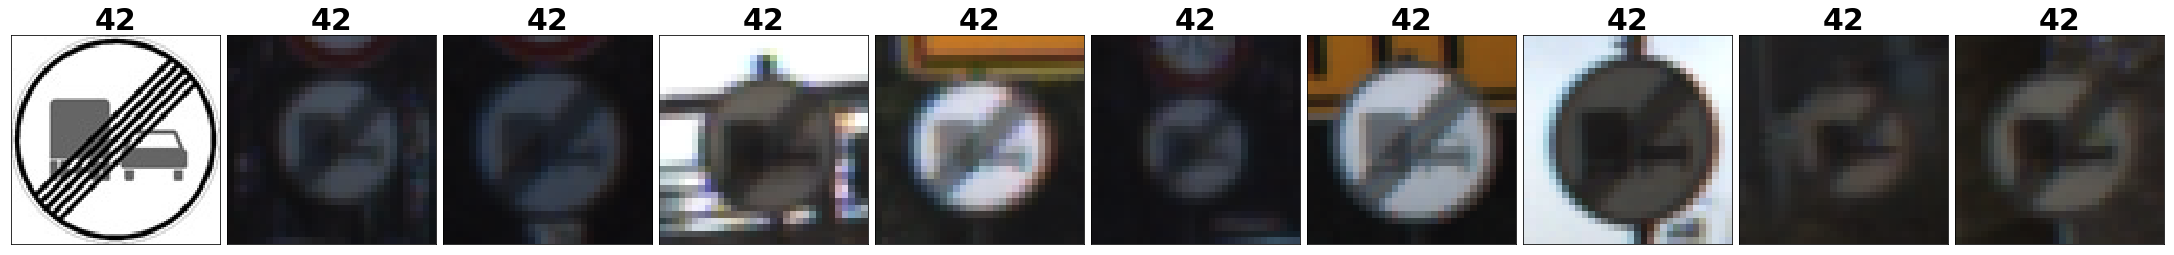

In [6]:
show_class_by_class_images(X_train,y_train)

### Histogram visualization function defintion

In [7]:
# histogram of label frequency
# show each class
def show_single_class_histogram(trainlabel, sumclass=n_classes):
    """"
    show single images histogram
    
    Arguments:
        images: source images
        lables: source corresponding label
    """
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    width = 0.8 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width/2, hist_train, align='center', width=width)
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.xlabel('Classes')  
    plt.ylabel('Count of each class') 
    plt.show()
    
def show_compared_class_histogram(trainlabel, testlabel, sumclass=n_classes):
    """"
    Show compared class histogram
    
    Arguments:
        images: source images
        lables: source corresponding label
    """
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    hist_test, bins_test = np.histogram(testlabel, bins=sumclass)
    width = 0.5 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width, hist_train, align='center', width=width)
    l2 = plt.bar(center, hist_test, align='center', width=width)
    plt.legend((l1, l2), ('first set', 'second set'))
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.xlabel('Classes')  
    plt.ylabel('Numbers of each class') 
    plt.show()

### Histogram visualization of the original train,valid and test dataset

Train dataset showing:


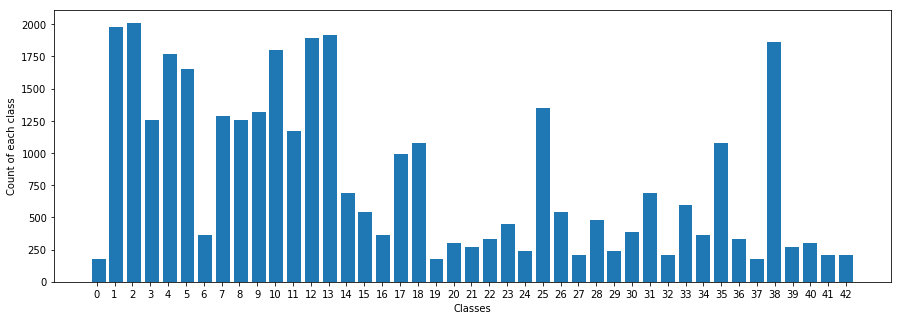

Valid dataset showing:


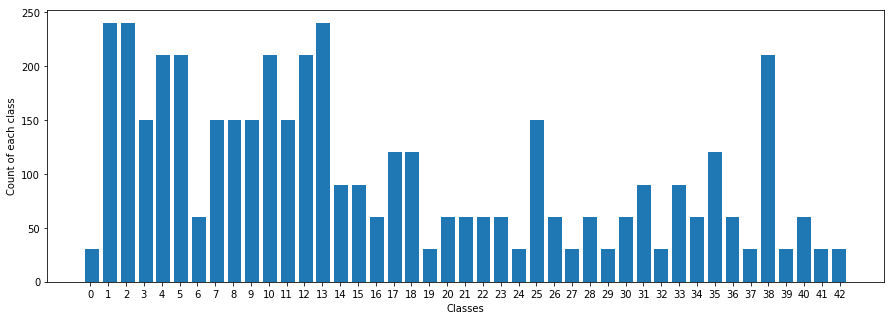

Test dataset showing:


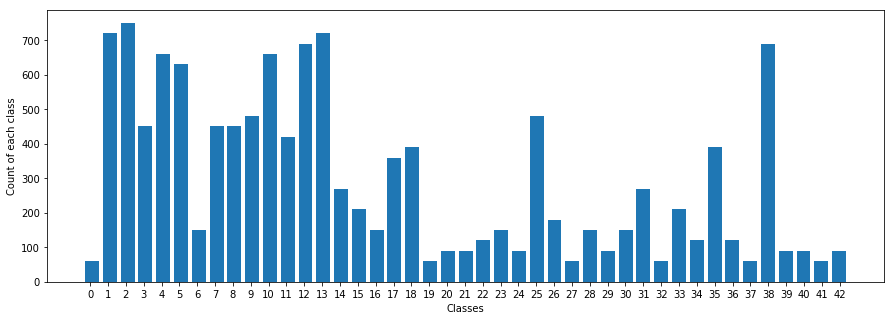

In [8]:
print("Train dataset showing:")
show_single_class_histogram(y_train)

print("Valid dataset showing:")
show_single_class_histogram(y_valid)

print("Test dataset showing:")
show_single_class_histogram(y_test)

### Histogram visualization comparation of the original train and test dataset

Train dataset compared with test dataset showing:


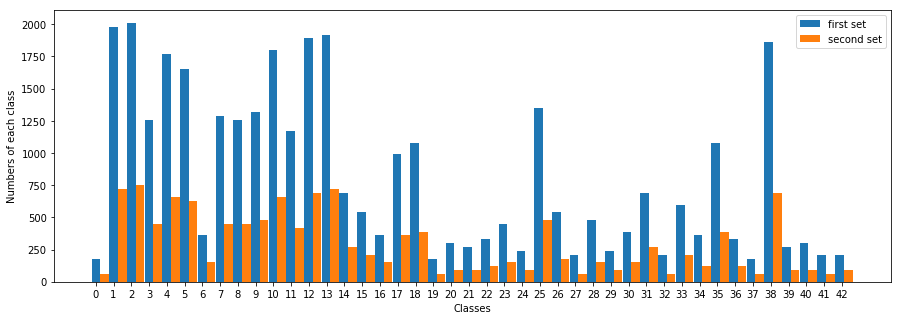

In [9]:
print("Train dataset compared with test dataset showing:")
show_compared_class_histogram(y_train,y_test,n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs.

Those aspects will be considered in this chapter:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data to banlance each class.

### Generate fake data to balance image numbers of  per label

#### Image Data Generator function definition

In [10]:
import cv2
from skimage import io, color, exposure, transform
from skimage.util import random_noise


def gamma_correction(img, correction):
    """"
    Gamma correction function
    
    """
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)


def gammaImage(img,gammarate= 0.4):
    """"
    Gamma correction function as expection of brightness lighting conditions
    
    """
    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)   
#     HSV[:,:,2] = gamma_correction((HSV[:,:,2]),0.6)
    HSV[:,:,2] = gamma_correction((HSV[:,:,2]),(2*gammarate * np.random.random_sample(1) + 1-gammarate))
    img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
    return img

def gaussian_blur(img, kernel_size=3):
    """"
    Gaussian blur function as expection of motion-blur
    
    """
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def gaussian_noise(img):
    """"
    Gaussian noise function as expection of noise
    
    """
    var = 0.001*np.random.random_sample(1)
    return np.uint8(255*random_noise(img/255, mode="gaussian",var=var))

def randomerase(img, hlimt=14,wlimit=14):
    """"
    Gaussian erase function as expection of occlusions or physical damage
    
    """
    imgshape = img.shape
    h = np.random.randint(0, hlimt)
    w = np.random.randint(0, wlimit)
    x1 = np.random.randint(0, imgshape[0] - h)
    y1 = np.random.randint(0, imgshape[1] - w)
    cropimg =np.copy(img)
    cropimg[x1:x1+h, y1:y1+w,0] = 127
    cropimg[x1:x1+h, y1:y1+w,1] = 127
    cropimg[x1:x1+h, y1:y1+w,2] = 127
    return cropimg

def DataAugumentProcess(img,gammarate = 0.5,blurrate = 0.2,randomeraserte=0.2):
    """"
    Data Augumention Process function
    
    """
    img = gammaImage(img,gammarate)
    if(np.random.random_sample(1) < blurrate):
        img = gaussian_blur(img)
    if(np.random.random_sample(1) < randomeraserte):
        img = randomerase(img)   
    
    img = gaussian_noise(img)
    
    return img

#### Image Data Generator function definition to show

In [11]:
# creat the generator to perform online data augmentation
from keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rotation_range=5.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=25,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   preprocessing_function=DataAugumentProcess)


# take a random image from the training set
def gen_class_images_show(images,lables,class_n):
    """"
    Generate specified one class image for show testing
    
    """
    imagemarkimg = np.copy(X_train[y_train == class_n])
    labelmarkimg = y_train[y_train == class_n] 
    
    img_rgb = imagemarkimg[np.random.randint(len(labelmarkimg))].astype(np.uint8)
    # plot the original image
    plt.figure(figsize=(2,2))
    plt.imshow(img_rgb)
    plt.title('Source of RGB image (class = {})'.format(class_n))
    plt.axis('off')
    plt.show()
    
    x = np.empty((0,img_rgb.shape[0],img_rgb.shape[1],img_rgb.shape[2]),dtype='uint8')
    y = np.empty(0,dtype='uint8')
    
    print('Generating of RGB image (class = {})'.format(class_n))
    print()
    batch_size = 30
    for x_batch, y_batch in image_datagen.flow(imagemarkimg,labelmarkimg, batch_size=batch_size):
#         print(x.shape)
#         print(x_batch.shape)
        x = np.concatenate((x,x_batch.astype(np.uint8)),axis=0)
        y = np.concatenate((y,y_batch),axis=0)
#         print(x.shape)
        break
    
    show_one_class_images(x,y,class_n,batch_size,False)

Using TensorFlow backend.


### Image Data Generator function show test

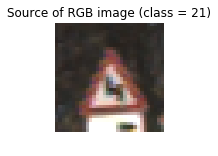

Generating of RGB image (class = 21)

Show Class=[21],Name=[Double curve] from data set,Show length is [30],Total length is [30]


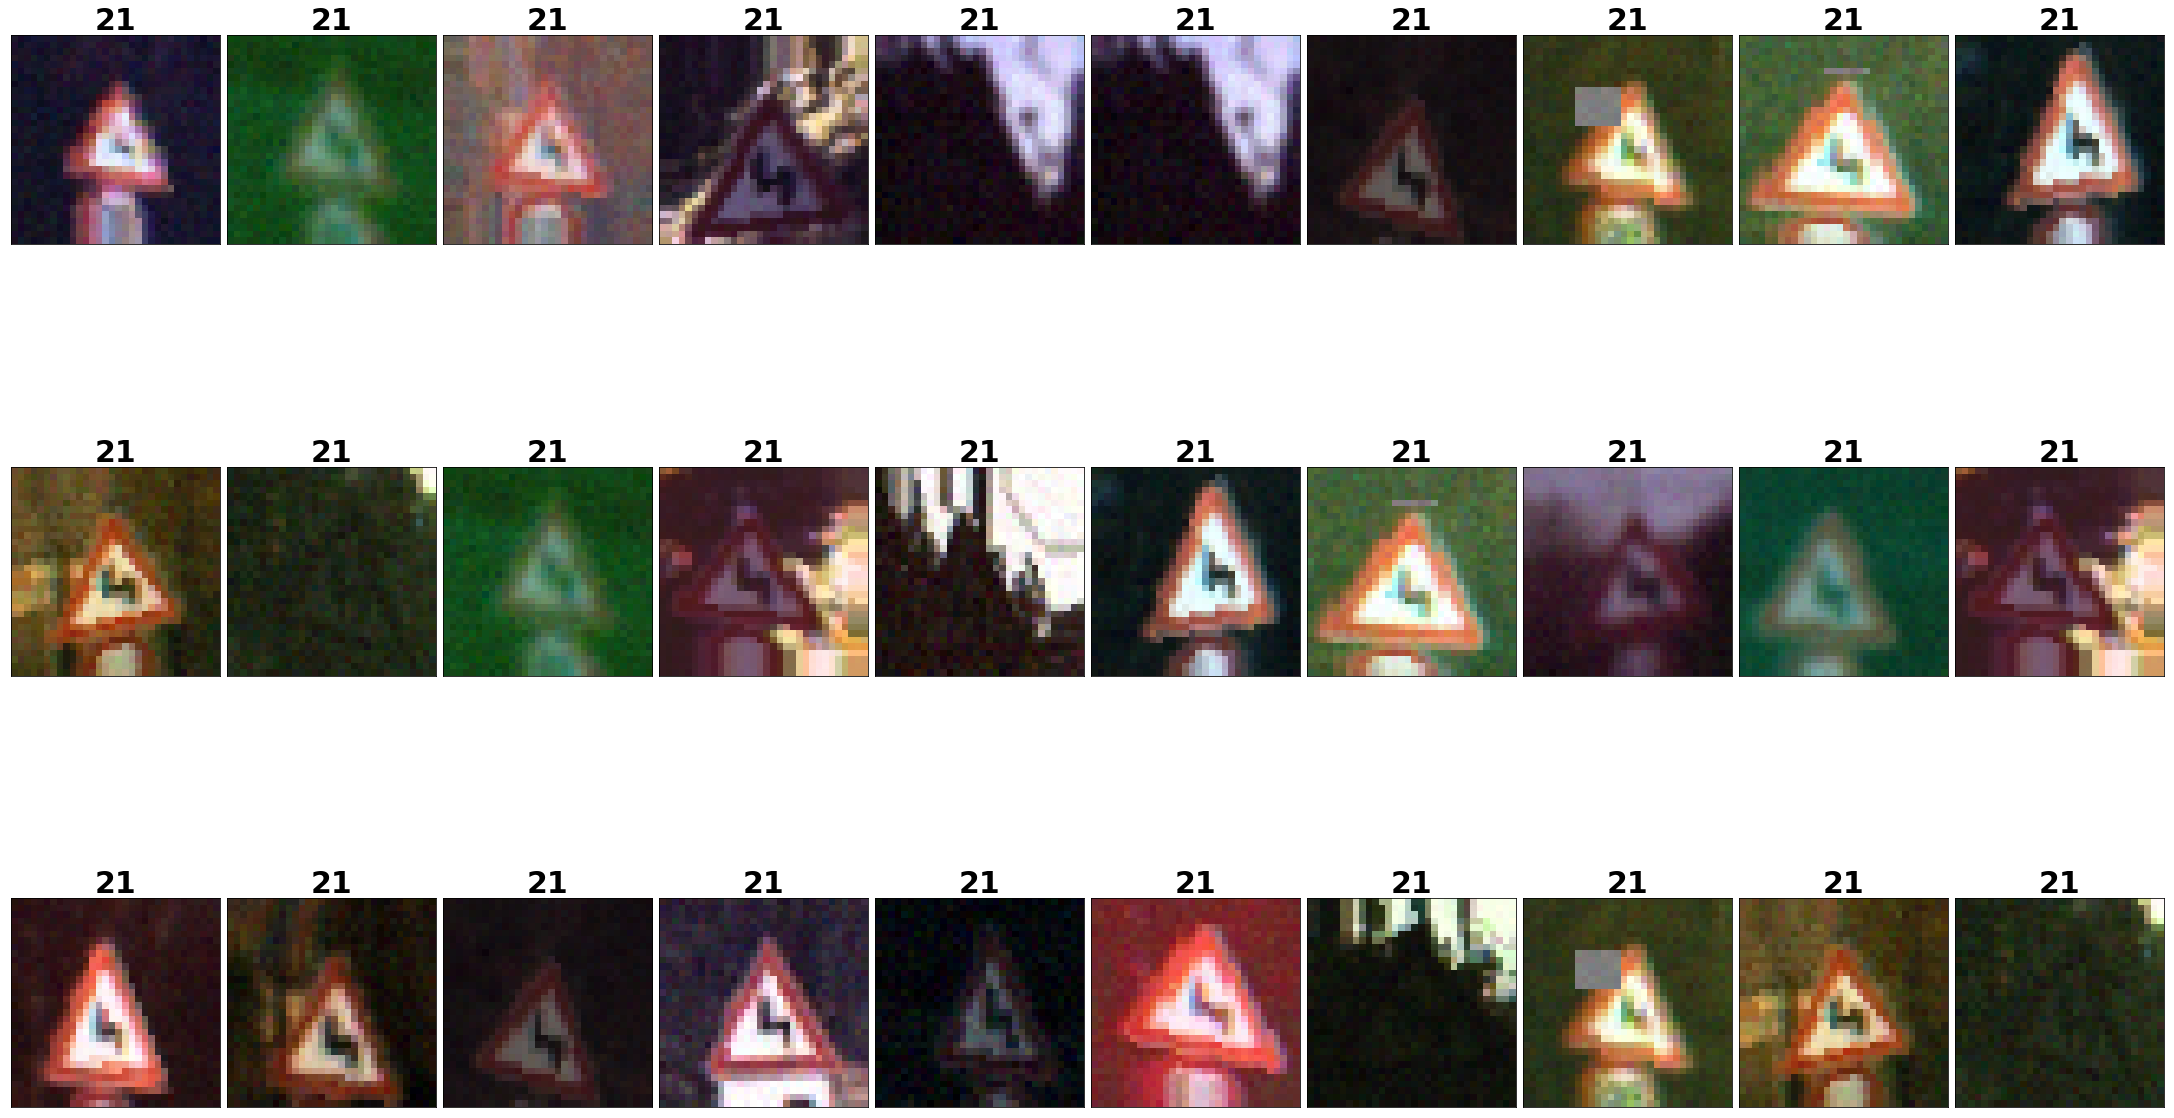

In [12]:
gen_class_images_show(X_train,y_train,21)

#### Image Data Generator function definition

In [13]:
def gen_class_images(images,lables,sumclass,n_min_samples = 6000,batch_size = 128):
    """"
    Generate specified one class image
    
    """
    for class_n in range(0,sumclass):
        print("Class ",class_n, ': ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)
        print(n_samples,end='')
        
        batch_counter = (n_min_samples-n_samples)
        
        
        while( batch_counter >= 0):
            for x_batch, y_batch in image_datagen.flow(imagemarkimg, labelmarkimg,batch_size):
                images = np.concatenate((images, x_batch.astype(np.uint8)), axis=0)
                lables = np.concatenate((lables, y_batch), axis=0)
                
                if batch_counter < 0:
                    break
                    
                batch_counter -= batch_size
            
            n_samples = len(images[lables == class_n])
            batch_counter = (n_min_samples-n_samples)
        
        print(' Generating samples numbers = {}'.format(n_samples))
        
    return images,lables

### Train dataset enlarge

In [16]:
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

### Image Data Generating

In [17]:
X_train,y_train = gen_class_images(X_train,y_train,n_classes)

Class  0 : 240 Generating samples numbers = 6128
Class  1 : 2460 Generating samples numbers = 6072
Class  2 : 2490 Generating samples numbers = 6132
Class  3 : 1560 Generating samples numbers = 6216
Class  4 : 2190 Generating samples numbers = 6044
Class  5 : 2070 Generating samples numbers = 6060
Class  6 : 480 Generating samples numbers = 6144
Class  7 : 1590 Generating samples numbers = 6050
Class  8 : 1560 Generating samples numbers = 6216
Class  9 : 1620 Generating samples numbers = 6140
Class  10 : 2220 Generating samples numbers = 6104
Class  11 : 1470 Generating samples numbers = 6008
Class  12 : 2310 Generating samples numbers = 6028
Class  13 : 2400 Generating samples numbers = 6208
Class  14 : 870 Generating samples numbers = 6090
Class  15 : 720 Generating samples numbers = 6144
Class  16 : 480 Generating samples numbers = 6144
Class  17 : 1230 Generating samples numbers = 6072
Class  18 : 1320 Generating samples numbers = 6176
Class  19 : 240 Generating samples numbers = 6

### Generated Data Save

In [18]:
train_dataset_file = "traffic-signs-data/gen_train.p"

print("Number of training examples after augmenting and balancing training data =", X_train.shape[0])
pickle.dump({
        "features" : X_train,
        "labels" : y_train
    }, open(train_dataset_file, "wb" ),protocol=4)
print("Generated balanced dataset saved in", train_dataset_file)

Number of training examples after augmenting and balancing training data = 263063
Generated balanced dataset saved in traffic-signs-data/gen_train.p


### Generated Data Restored

In [14]:
train_dataset_file = "traffic-signs-data/gen_train.p"

with open(train_dataset_file, mode='rb') as f:
    gen_train = pickle.load(f)
    
X_train, y_train = gen_train['features'], gen_train['labels']
print("Number of training examples after augmenting and balancing training data =", X_train.shape[0])

Number of training examples after augmenting and balancing training data = 263063


### Generate train and valid dateset

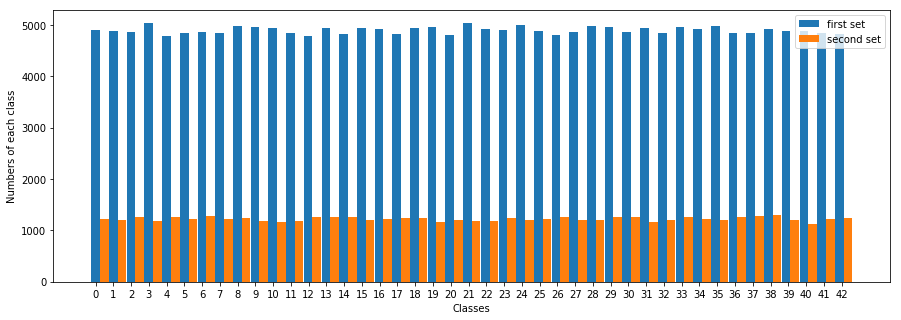

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

show_compared_class_histogram(y_train,y_valid,n_classes)

### Pre-process the Data Set (normalization, grayscale, etc.)

Pre-process dataset from 0~255 to -0.5~0.5.

In [16]:
def normalizeyImage(img):
    # Histogram normalization in y
    
#     return cv2.cvtColor(img, cv2.COLOR_YCrCb2GRAY)
#     return np.resize(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),(32,32,1))
    img = img/255.0-0.5
    
    return (img)

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(normalizeyImage((img)))
    return np.array(ret_array)

X_train_pre = preprocessImages(X_train)
X_valid_pre = preprocessImages(X_valid)
X_test_pre = preprocessImages(X_test)

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def VGGlike(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    keep_prob1 = tf.placeholder(tf.float32)
    keep_prob2 = tf.placeholder(tf.float32)
    keep_prob3 = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1,name="conv1")
    
#     conv1 = tf.nn.dropout(conv1, keep_prob1)
    
    # SOLUTION: Layer 2: Convolutional.  Input = 32x32x32. Output = 32x32x32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2,name="conv2")

    # SOLUTION: Pooling. Input = 32x32x32. Output = 16x16x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = tf.nn.dropout(conv2, keep_prob1)
    
    # SOLUTION: Layer 3: Convolutional.  Input = 16x16x32. Output = 16x16x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3,name="conv3")
    
#     conv3 = tf.nn.dropout(conv3, keep_prob1)
    
    # SOLUTION: Layer 4: Convolutional.  Input = 16x16x64. Output = 16x16x64
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma,name="conv4_W"))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4,name="conv4")

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv4 = tf.nn.dropout(conv4, keep_prob1)
    
    # SOLUTION: Layer 5: Convolutional.  Input = 16x16x64. Output = 16x16x128
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma,name="conv5_W"))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5,name="conv5")
    
#     conv5 = tf.nn.dropout(conv5, keep_prob2)
    
    # SOLUTION: Layer 6: Convolutional.  Input = 16x16x128. Output = 16x16x128
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma,name="conv6_W"))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6,name="conv6")

    # SOLUTION: Pooling. Input = 16x16x128. Output = 8x8x128.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv6 = tf.nn.dropout(conv6, keep_prob2)
    
    fc0   = flatten(conv6)

    # SOLUTION: Layer 1: Fully Connected. Input = 2048. Output = 2048.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob3)

    # SOLUTION: Layer 2: Fully Connected. Input = 2048. Output = 2048.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(2048))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob3)

    # SOLUTION: Layer 3: Fully Connected. Input = 2048. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(2048, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
  
    regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) 
#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) +\
#         tf.nn.l2_loss(conv4_W) + tf.nn.l2_loss(conv5_W) + tf.nn.l2_loss(conv6_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc3_W)

    return logits,keep_prob1,keep_prob2,keep_prob3,phase,regularizers

### Model Train Function Definition

In [18]:
# rate = 0.001
# EPOCHS = 50
# BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits,keep_prob1,keep_prob2,keep_prob3,phase,loss_regularizers = VGGlike(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# loss_operation = tf.reduce_mean(cross_entropy+ 0.0005*loss_regularizers)
# optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data,BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0,keep_prob3: 1.0,phase: 0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train model

In [35]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0005
lossrate = 0.0001

loss_operation = tf.reduce_mean(cross_entropy + lossrate*loss_regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

def trainmodel(x_train_data,y_train_data,x_valid_data,y_valid_data,EPOCHS = 80,BATCH_SIZE = 128,logstart = 0.3,require_improvement = 20):
    # Best validation accuracy seen so far.
    best_validation_accuracy = 0.0
    
    start_log = EPOCHS * logstart
    
    # Iteration-number for last improvement to validation accuracy.
    last_improvement = start_log

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(x_train_data)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            x_train_data, y_train_data = shuffle(x_train_data, y_train_data)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = x_train_data[offset:end], y_train_data[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 0.9,keep_prob2: 0.8,keep_prob3:0.5,phase: 1})

            test_accuracy = evaluate(x_train_data, y_train_data,BATCH_SIZE)
            print("EPOCH {} ...".format(i+1),end=' ')
            print("test Accuracy = {:.4f}".format(test_accuracy),end=' ')
            validation_accuracy = evaluate(x_valid_data, y_valid_data,BATCH_SIZE)
            print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        
            # If validation accuracy is an improvement over best-known.
            if i > start_log and validation_accuracy > best_validation_accuracy:
                # Update the best-known validation accuracy.
                best_validation_accuracy = validation_accuracy
                
                # Set the iteration for the last improvement to current.
                last_improvement = i

                # Save all variables of the TensorFlow graph to file.
                saver.save(sess, './lenet')
                
            # If no improvement found in the required number of iterations.
            if i - last_improvement > require_improvement:
                print("No improvement found in a loop, stopping optimization.")
                
                # Break out from the for-loop.
                break
        
    #     saver.save(sess, './lenet')
    #     print("Model saved")

    # Print result.
    print("best Accuracy = {:.4f} Model saved".format(best_validation_accuracy))

In [36]:
trainmodel(X_train_pre,y_train,X_valid_pre,y_valid)

Training...

EPOCH 1 ... test Accuracy = 0.9455 Validation Accuracy = 0.9425
EPOCH 2 ... test Accuracy = 0.9702 Validation Accuracy = 0.9660
EPOCH 3 ... test Accuracy = 0.9806 Validation Accuracy = 0.9751
EPOCH 4 ... test Accuracy = 0.9791 Validation Accuracy = 0.9736
EPOCH 5 ... test Accuracy = 0.9822 Validation Accuracy = 0.9766
EPOCH 6 ... test Accuracy = 0.9869 Validation Accuracy = 0.9803
EPOCH 7 ... test Accuracy = 0.9873 Validation Accuracy = 0.9802
EPOCH 8 ... test Accuracy = 0.9871 Validation Accuracy = 0.9790
EPOCH 9 ... test Accuracy = 0.9908 Validation Accuracy = 0.9833
EPOCH 10 ... test Accuracy = 0.9897 Validation Accuracy = 0.9822
EPOCH 11 ... test Accuracy = 0.9917 Validation Accuracy = 0.9847
EPOCH 12 ... test Accuracy = 0.9896 Validation Accuracy = 0.9833
EPOCH 13 ... test Accuracy = 0.9912 Validation Accuracy = 0.9840
EPOCH 14 ... test Accuracy = 0.9931 Validation Accuracy = 0.9854
EPOCH 15 ... test Accuracy = 0.9903 Validation Accuracy = 0.9813
EPOCH 16 ... test Acc

### Finetune model

In [44]:
rate = 0.0001
lossrate = 0.0001

loss_operation = tf.reduce_mean(cross_entropy + lossrate*loss_regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

def finetunemodel(x_train_data,y_train_data,x_valid_data,y_valid_data,EPOCHS = 80,BATCH_SIZE = 128,logstart = 0,require_improvement = 10):
    # Best validation accuracy seen so far.
    best_validation_accuracy = 0.0
    
    start_log = EPOCHS * logstart
    
    # Iteration-number for last improvement to validation accuracy.
    last_improvement = start_log

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        num_examples = len(x_train_data)
    
        print("Finetune Training...")
        print()
        for i in range(EPOCHS):
            x_train_data, y_train_data = shuffle(x_train_data, y_train_data)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = x_train_data[offset:end], y_train_data[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 0.9,keep_prob2: 0.8,keep_prob3:0.5,phase: 1})

            test_accuracy = evaluate(x_train_data, y_train_data,BATCH_SIZE)
            print("EPOCH {} ...".format(i+1),end=' ')
            print("test Accuracy = {:.4f}".format(test_accuracy),end=' ')
            validation_accuracy = evaluate(x_valid_data, y_valid_data,BATCH_SIZE)
            print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        
            # If validation accuracy is an improvement over best-known.
            if i > start_log and validation_accuracy > best_validation_accuracy:
                # Update the best-known validation accuracy.
                best_validation_accuracy = validation_accuracy
                
                # Set the iteration for the last improvement to current.
                last_improvement = i

                # Save all variables of the TensorFlow graph to file.
                saver.save(sess, './lenet')
                print("Model Save!")
                
            # If no improvement found in the required number of iterations.
            if i - last_improvement > require_improvement:
                print("No improvement found in a loop, stopping optimization.")
                
                # Break out from the for-loop.
                break
        
    # Print result.
    print("best Accuracy = {:.4f} Model saved".format(best_validation_accuracy))        

In [45]:
finetunemodel(X_train_pre,y_train,X_valid_pre,y_valid)

INFO:tensorflow:Restoring parameters from ./lenet
Finetune Training...

EPOCH 1 ... test Accuracy = 0.9986 Validation Accuracy = 0.9895
EPOCH 2 ... test Accuracy = 0.9986 Validation Accuracy = 0.9894
Model Save!
EPOCH 3 ... test Accuracy = 0.9988 Validation Accuracy = 0.9900
Model Save!
EPOCH 4 ... test Accuracy = 0.9990 Validation Accuracy = 0.9899
EPOCH 5 ... test Accuracy = 0.9991 Validation Accuracy = 0.9899
EPOCH 6 ... test Accuracy = 0.9991 Validation Accuracy = 0.9902
Model Save!
EPOCH 7 ... test Accuracy = 0.9992 Validation Accuracy = 0.9903
Model Save!
EPOCH 8 ... test Accuracy = 0.9993 Validation Accuracy = 0.9899
EPOCH 9 ... test Accuracy = 0.9994 Validation Accuracy = 0.9900
EPOCH 10 ... test Accuracy = 0.9995 Validation Accuracy = 0.9899
EPOCH 11 ... test Accuracy = 0.9996 Validation Accuracy = 0.9901
EPOCH 12 ... test Accuracy = 0.9996 Validation Accuracy = 0.9898
EPOCH 13 ... test Accuracy = 0.9996 Validation Accuracy = 0.9903
Model Save!
EPOCH 14 ... test Accuracy = 0.9

### Evaluate on test dataset 

In [19]:
def testdataset(X_data, y_data,BATCH_SIZE = 128):
    with tf.Session() as sess:
#         saver.restore(sess, tf.train.latest_checkpoint('.'))
        saver.restore(sess, "./lenet")

        test_accuracy = evaluate(X_data, y_data,BATCH_SIZE)
        print("Test Accuracy = {:.4f}".format(test_accuracy))

In [20]:
testdataset(X_test_pre,y_test)

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.9936


### Trained Model Summary

Designed model get **99.99%** on traindataset **99.06%** on validdataset **99.36%** on test dataset.

### Analyze Model Performance

In [21]:
def predict(X_data, y_data,fun,BATCH_SIZE = 128):
    num_examples = len(y_data)
    total_accuracy = 0
    ret_array = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        lable = sess.run(fun, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0,keep_prob3: 1.0,phase: 0})
        ret_array.extend(lable)
    return np.array(ret_array)

In [22]:
def labelpredict(X_data, y_data,logits=logits,BATCH_SIZE=128):
    y_pred = tf.nn.softmax(logits=logits)
    y_pred_cls = tf.argmax(y_pred, axis=1)
    
    lables = []
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        lables = predict(X_data, y_data,y_pred_cls)
    
    return lables

In [23]:
preditlables = labelpredict(X_test_pre,y_test)

INFO:tensorflow:Restoring parameters from .\lenet


In [24]:
def show_all_images(images,lables,cmap=None):
    cols = 15
    sumclass = len(images)
    rows = (sumclass+cols-1)//cols 
    
    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        showimage = images[i]
         # use gray scale color map if there is only one channel   
        showimage_shape = showimage.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(lables[i],fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

Total 81 incorrectly predicted images :


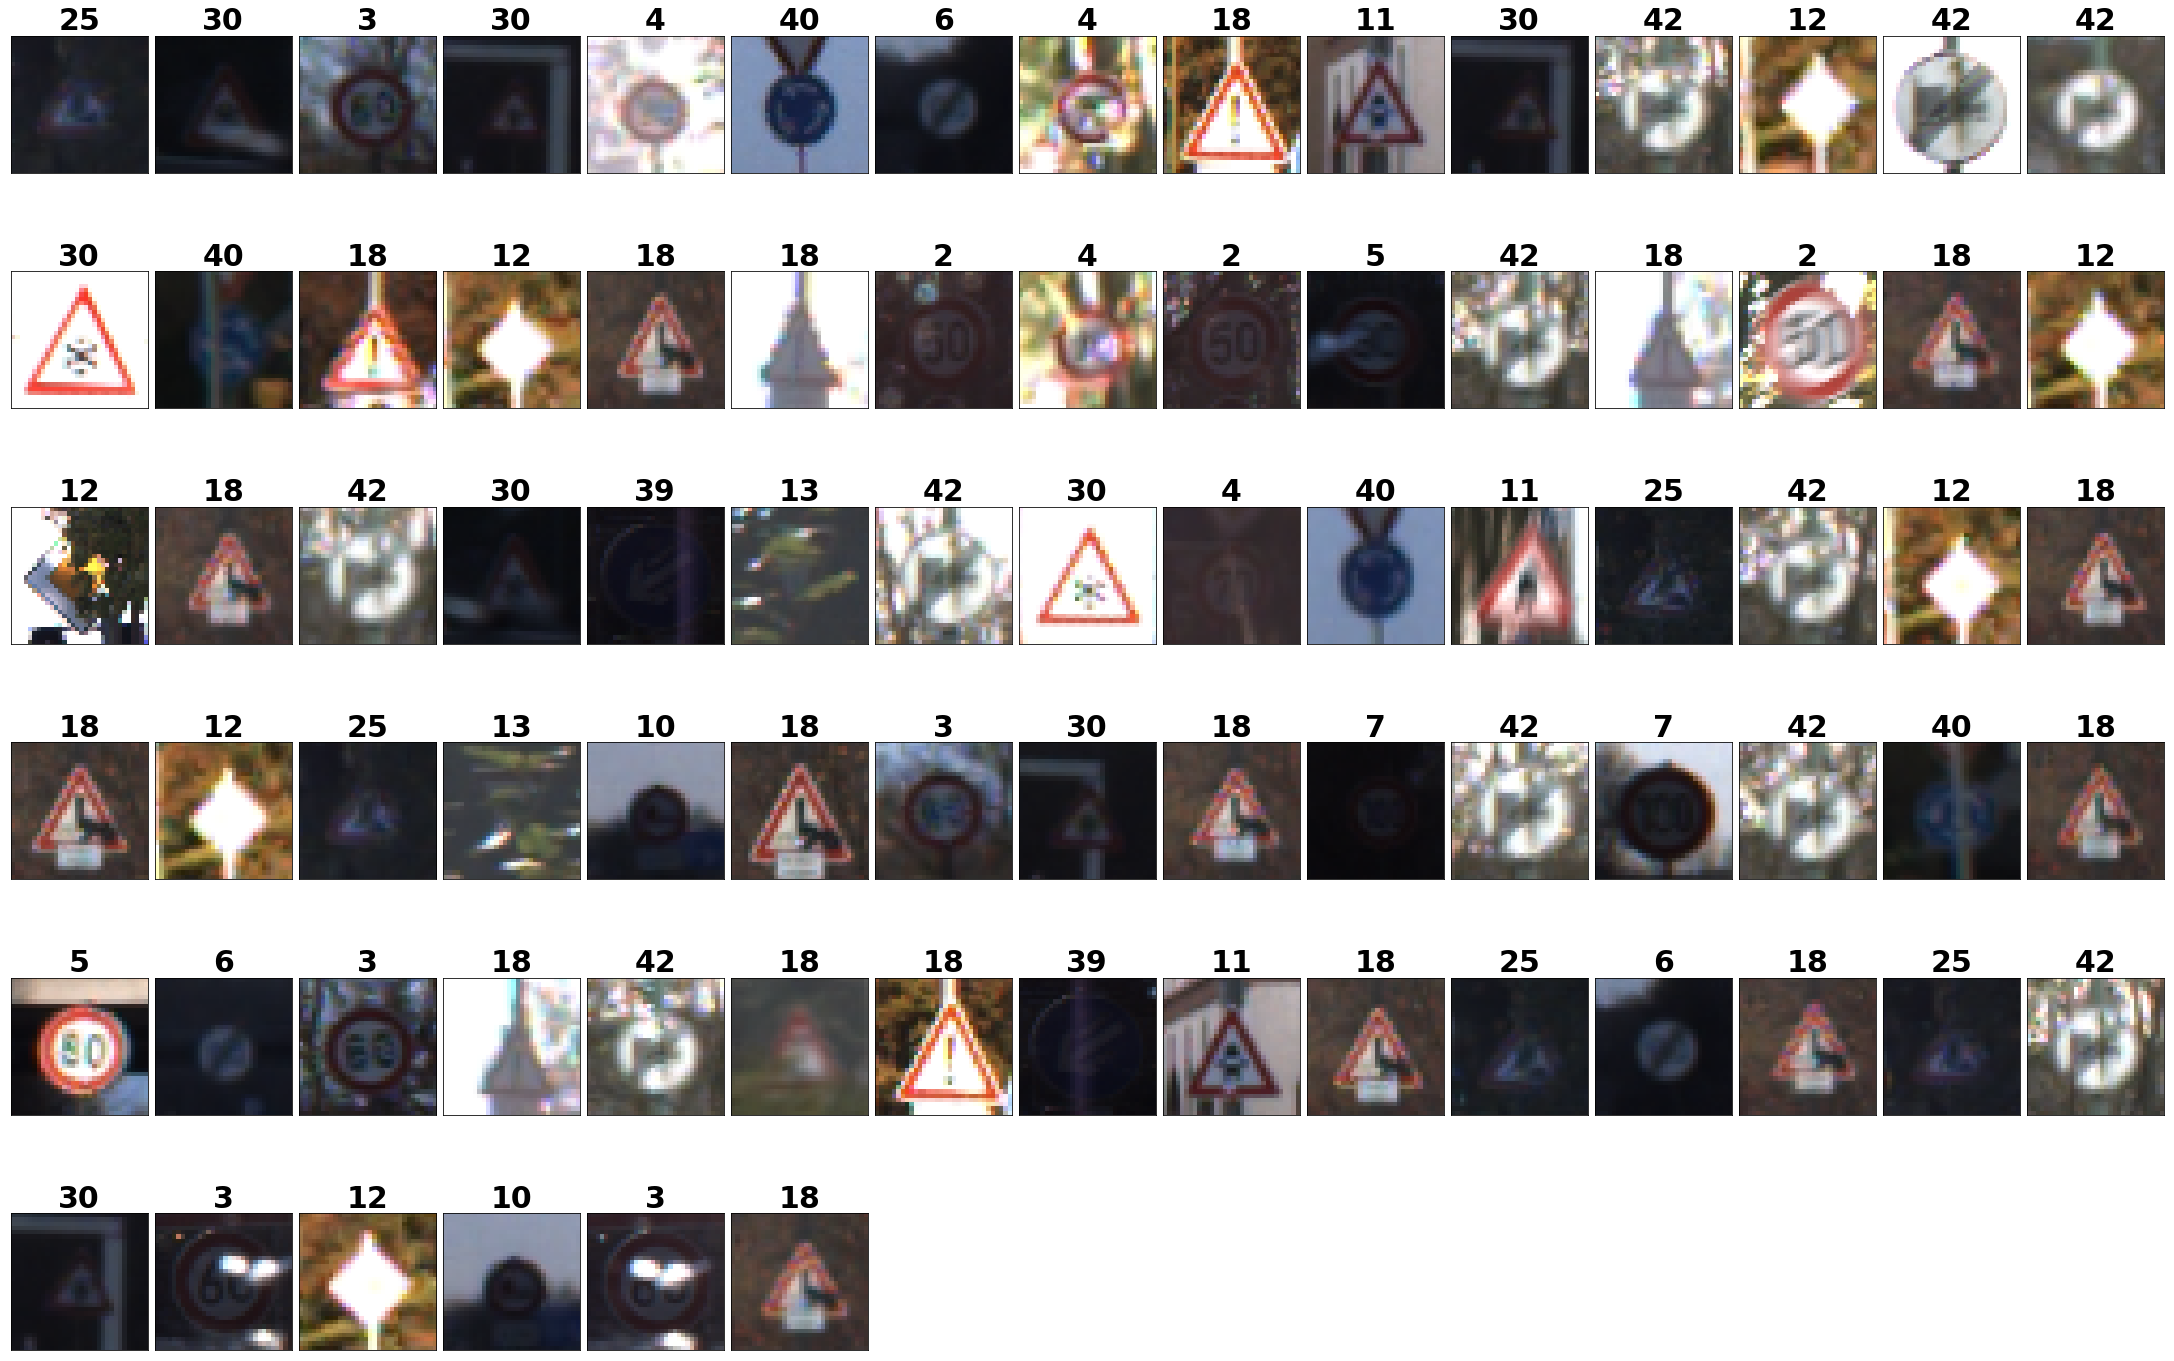

In [25]:
incorrectly_predictedx = X_test[y_test != preditlables]
incorrectly_predictedy = y_test[y_test != preditlables]
print("Total {} incorrectly predicted images :".format(len(incorrectly_predictedy)))

show_all_images(incorrectly_predictedx,incorrectly_predictedy)

incorrectly predicted one specified images summary:
Show Class=[12],Name=[Priority road] from data set,Show length is [7],Total length is [7]


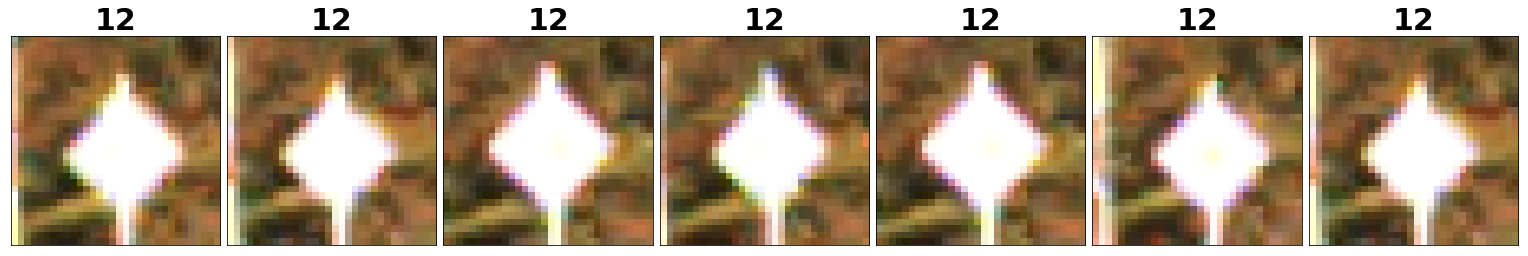

In [26]:
print("incorrectly predicted one specified images summary:")

show_one_class_images(incorrectly_predictedx,incorrectly_predictedy,12,50,False)

histogram of incorrectly predited labels frequency:


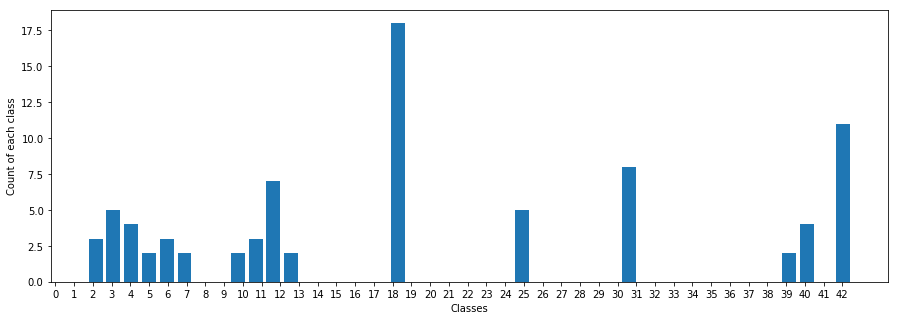

In [27]:
print("histogram of incorrectly predited labels frequency:")

show_single_class_histogram(incorrectly_predictedy,n_classes)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

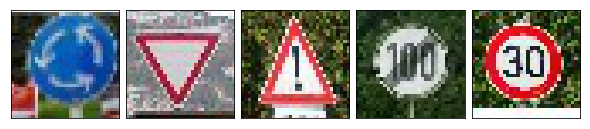

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from skimage import transform,data
import glob

def show_images(images, cmap=None):
    cols = 5
    rows = (len(images)+2)//cols 
    
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
test_images = np.reshape(test_images,(len(test_images),)+ test_images[0].shape)

show_images(test_images)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet
Predition on new images:


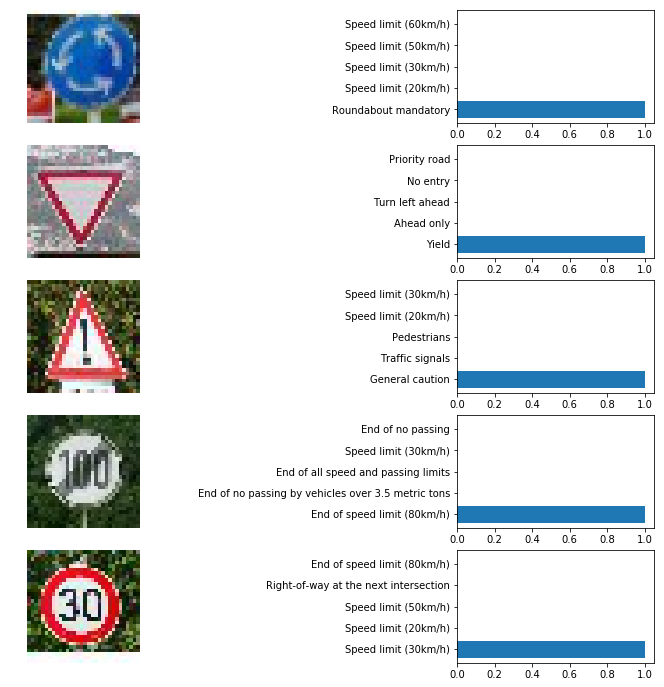

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#Visualize new raw images

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data,keep_prob1: 1.0,keep_prob2: 1.0,keep_prob3: 1.0, phase: 0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    test_images_pre = preprocessImages(test_images)
    signs_top_5=test_net(test_images_pre,sess)

print("Predition on new images:")
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 3, 3*i+1)
    plt.imshow(test_images[i]) 
#     plt.title(i)
    plt.axis('off')
    plt.subplot(5, 3, 3*i+3)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signnames[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()


### Analyze Performance

### Calculate the accuracy for these 5 new images. 

The model predicted 5 of 5 signs correctly, it's 100% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print(signs_top_5)

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.90007186e-25,   2.27990441e-25,
          2.09002016e-25,   8.87702157e-26],
       [  1.00000000e+00,   3.04265025e-36,   2.71042204e-38,
          0.00000000e+00,   0.00000000e+00],
       [  9.99994755e-01,   2.51699203e-06,   1.06595667e-06,
          1.06425318e-06,   2.26190352e-07],
       [  1.00000000e+00,   6.97633165e-24,   3.62018446e-24,
          8.66444143e-26,   5.09233842e-26]], dtype=float32), indices=array([[40,  0,  1,  2,  3],
       [13, 35, 34, 17, 12],
       [18, 26, 27,  0,  1],
       [ 6, 42, 32,  1, 41],
       [ 1,  0,  2, 11,  6]]))


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [31]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess,image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob1: 1.0,keep_prob2: 1.0,keep_prob3: 1.0,phase: 0})
    print("layer shape is {}".format(activation.shape))
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    if featuremaps > 48:
        featuremaps = 48
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Output Each Layer

In [32]:
def outputFeatureMapLayer(image_input,layer):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        conv_layer = tf.get_default_graph().get_tensor_by_name("conv{}:0".format(layer))
        print("conv layer is:")
        print(conv_layer)
        outputFeatureMap(sess,image_input,conv_layer)

input image shape is (1, 32, 32, 3)


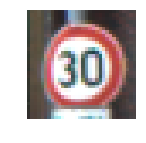

In [33]:
img_rgb_origin = X_test[1]
img_rgb = X_test_pre[1]
image_input = np.reshape(img_rgb,(1,)+ img_rgb.shape)
print("input image shape is {}".format(image_input.shape))

plt.figure(figsize=(2, 2))
plt.imshow(img_rgb_origin) 
plt.axis('off')
plt.show()

#### conv1 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv1:0", shape=(?, 32, 32, 32), dtype=float32)
layer shape is (1, 32, 32, 32)


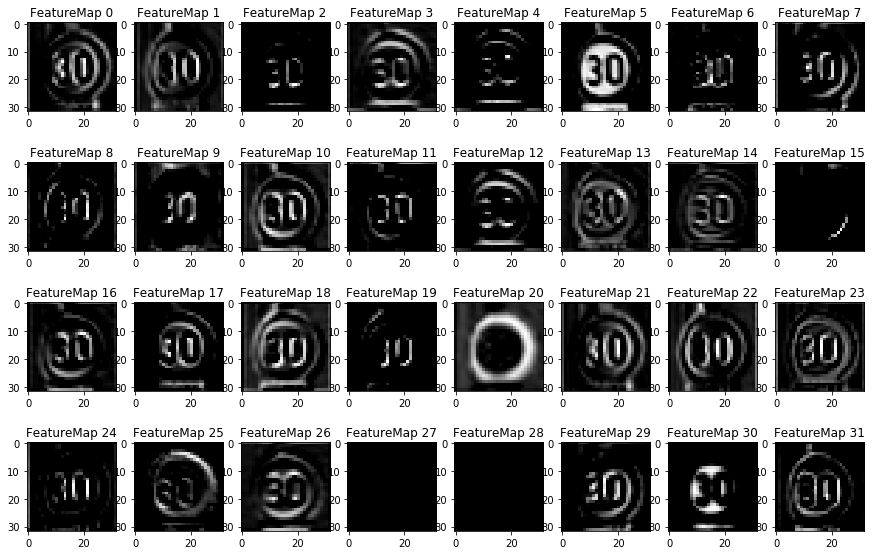

In [34]:
outputFeatureMapLayer(image_input,1)

#### conv2 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv2:0", shape=(?, 32, 32, 32), dtype=float32)
layer shape is (1, 32, 32, 32)


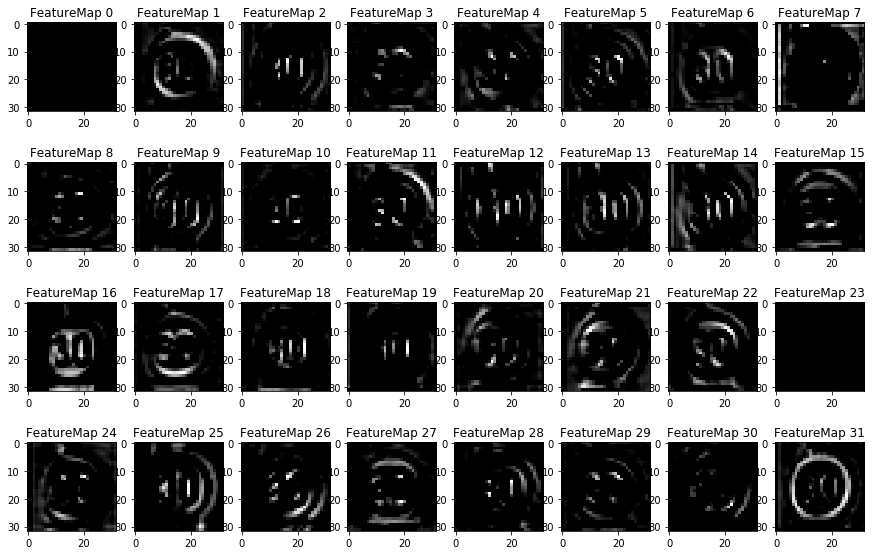

In [35]:
outputFeatureMapLayer(image_input,2)

#### conv3 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv3:0", shape=(?, 16, 16, 64), dtype=float32)
layer shape is (1, 16, 16, 64)


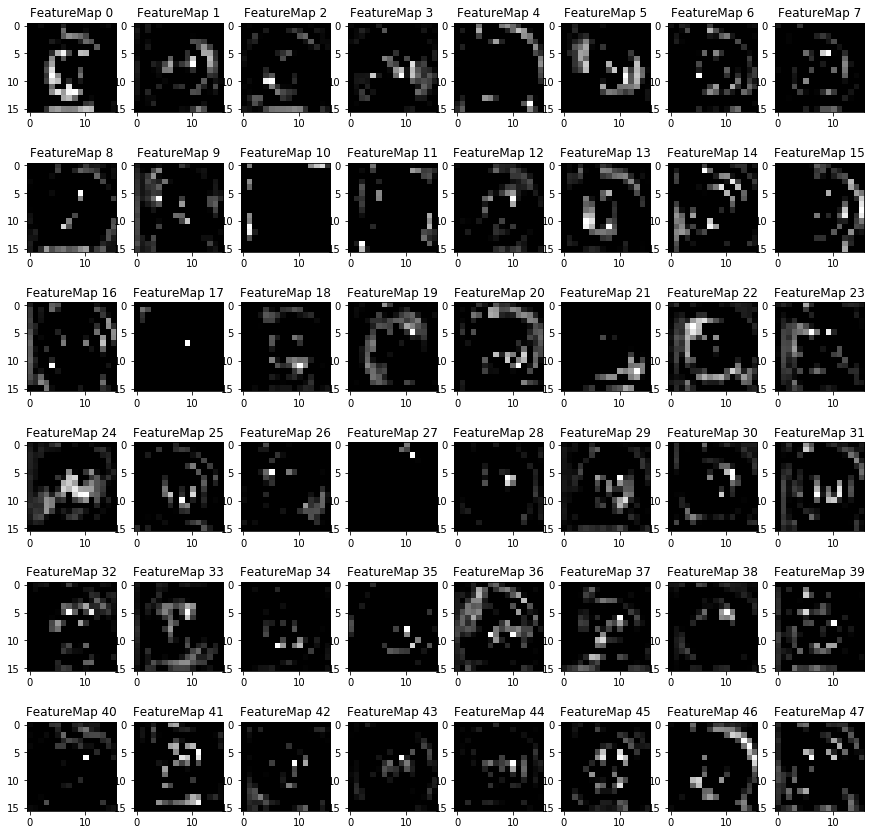

In [36]:
outputFeatureMapLayer(image_input,3)

#### conv4 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv4:0", shape=(?, 16, 16, 64), dtype=float32)
layer shape is (1, 16, 16, 64)


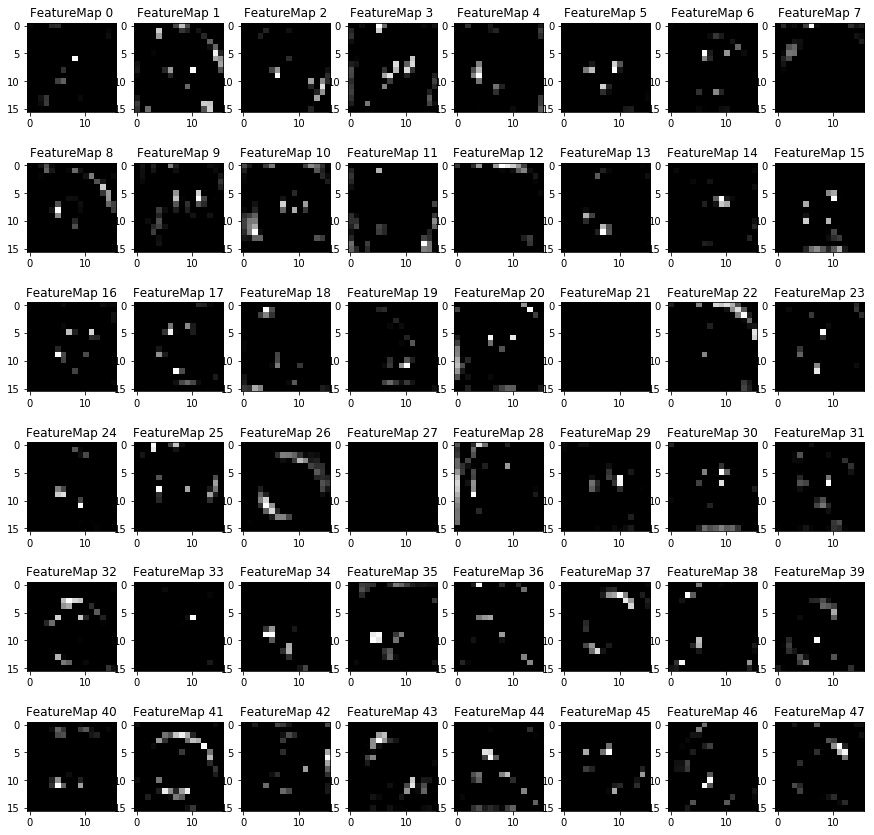

In [37]:
outputFeatureMapLayer(image_input,4)

#### conv5 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv5:0", shape=(?, 8, 8, 128), dtype=float32)
layer shape is (1, 8, 8, 128)


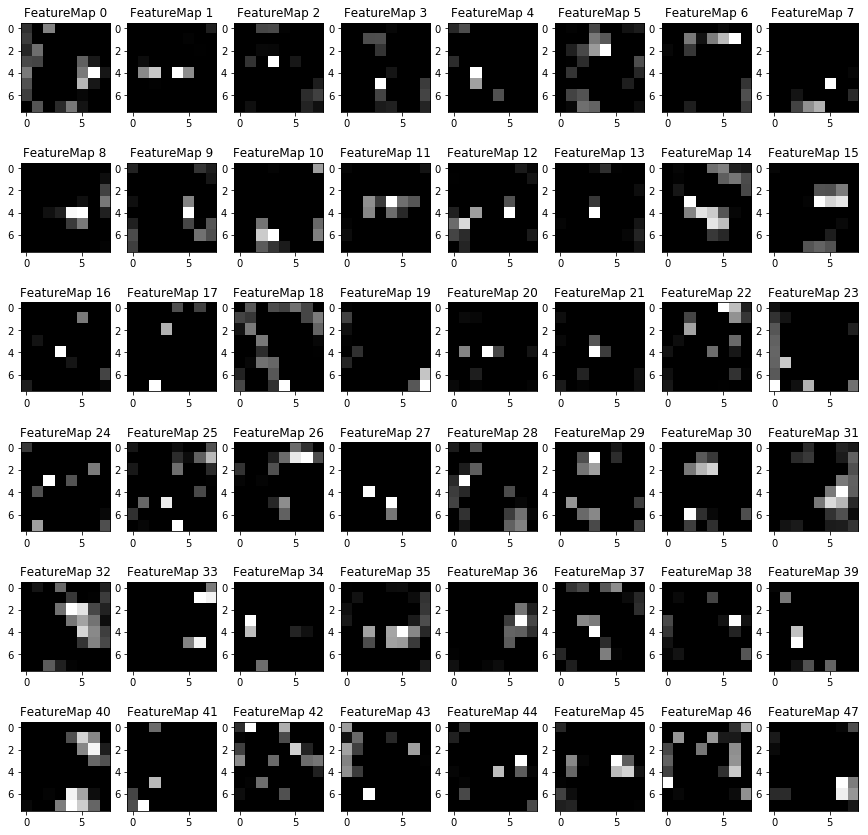

In [38]:
outputFeatureMapLayer(image_input,5)

#### conv6 Layer

INFO:tensorflow:Restoring parameters from .\lenet
conv layer is:
Tensor("conv6:0", shape=(?, 8, 8, 128), dtype=float32)
layer shape is (1, 8, 8, 128)


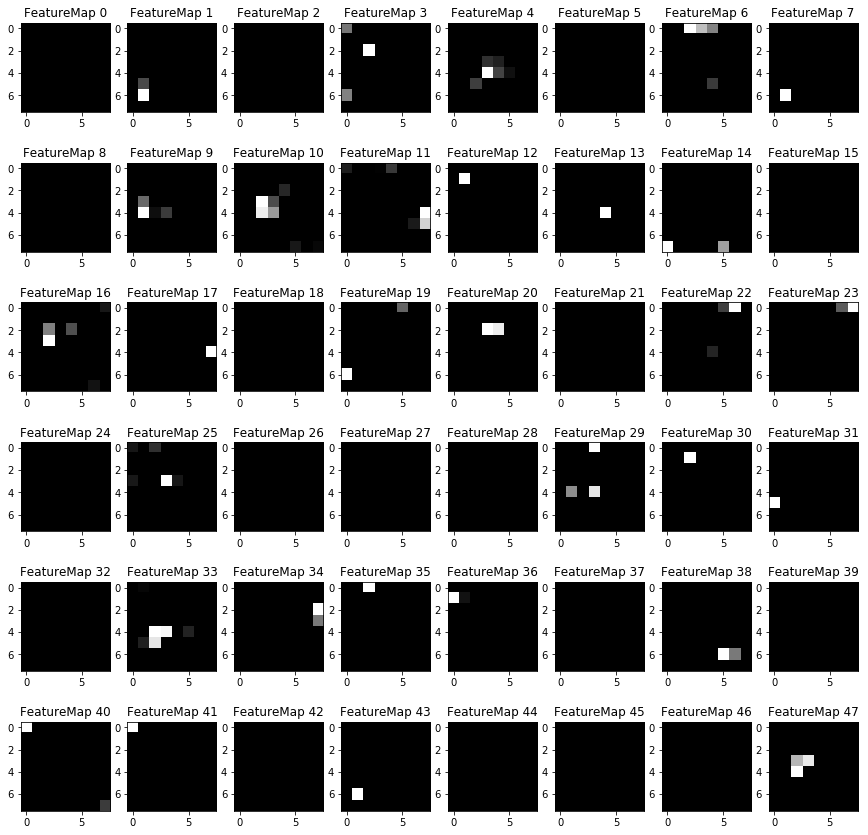

In [39]:
outputFeatureMapLayer(image_input,6)